<center>

### COSC2753 - Machine Learning

# **Exploratory Data Analysis (EDA)**

<center>────────────────────────────</center>
&nbsp;


# I. Introduction

**Exploratory Data Analysis (EDA)** is a fundamental initial step in any data analysis project. It involves a series of techniques to investigate and describe the key characteristics of a dataset. EDA leverages various visualization methods to uncover patterns, trends, and relationships between the data's variables.

In this notebook, we will conduct a thorough EDA on our dataset. This process will enhance our understanding of the data and prepare it for subsequent machine learning tasks. To be more specific, we will perform the following steps:

- **Data Loading:** We will begin by importing the dataset we intend to analyze.

- **Data Understanding:** This stage focuses on gaining familiarity with the data. We will explore the structure, identify the variables, and examine their data types.

- **Data Cleaning:** Here, we will address any inconsistencies, missing values, or errors present within the data.

- **Univariate Analysis:** We will delve deeper into each individual variable, analyzing its distribution and statistical properties.

- **Data Assessment:** Finally, we will comprehensively evaluate the data quality and identify any potential issues that might affect our machine learning model.

By the end of this notebook, we will have a better understanding of the dataset and be ready to move on to the next step in the machine learning process.


# II. Exploratory Data Analysis

## 1. Initial Setup

In [1]:
# Import necessary packages
import pandas as pd  # Data manipulation
import tabulate  # Pretty printing
import sys  # System specific parameters and functions
import importlib  # Importing modules
import os  # OS operations
import matplotlib.pyplot as plt  # Plotting
import numpy as np  # Numerical operations
import seaborn as sns  # Plotting

# Reload modules
sys.path.append("../../")  # Root directory
modules_to_reload = ["scripts.leon", "scripts.styler"]

# Reload modules if they have been modified
missing_modules = []

for module_name in modules_to_reload:
    if module_name in sys.modules:
        importlib.reload(sys.modules[module_name])
    else:
        missing_modules.append(module_name)

# Recache missing modules
if missing_modules:
    print(f"Modules {missing_modules} not found. \nRecaching...")

# Import user-defined scripts
from scripts.leon import Leon  # Leon class
from scripts.styler import Styler  # Styler class

# Configuration
pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", None)
pd.set_option("display.precision", 3)

# Initialize objects
leon = Leon()
styler = Styler()

Modules ['scripts.leon', 'scripts.styler'] not found. 
Recaching...

        @|\@@
       -  @@@@                                                            LEON 1.0.0
      /7   @@@@                                         This is Leon, the friendly lion. He is here to help you
     /    @@@@@@                                     Leon is tailored to manipulate images, data and visualizations
     \-' @@@@@@@@`-_______________                                      Made by: Team X
      -@@@@@@@@@             /    \                                     Version: 1.0.3
 _______/    /_       ______/      |__________-
/,__________/  `-.___/,_____________----------_)



## 2. Global Properties

In [2]:
# # Define the path to the zip file
# zip_data_path = "../../data/raw/Furniture_Data.zip"

# # Unzip data: Only run this once to extract the data. If the data is already extracted, ignore this line.
# df = leon.read_zip(zip_data_path)

In [3]:
# Define the base directory path
base_dir = "../../data/raw/Furniture_Data/Furniture_Data/"

# Construct the complete directory path
data_dir = os.path.abspath(os.path.join(os.getcwd(), base_dir))

# List all directories in the current directory
folders = [
    folder
    for folder in os.listdir(data_dir)
    if os.path.isdir(os.path.join(data_dir, folder))
]

# Populate the image_dir dictionary with folder names and paths
image_dir = {}
for folder in folders:
    folder_path = os.path.abspath(
        os.path.join(data_dir, folder)
    )  # Get the absolute path of the folder
    image_dir[folder] = folder_path

# Print the dictionary
styler.boxify("Image directories")
for folder, path in image_dir.items():
    print(f"{folder}: {path}")

# Define the path to the beds directory
beds_dir = os.path.join(data_dir, "beds")

# Get all folders in the beds directory
style_folders = [
    folder
    for folder in os.listdir(beds_dir)
    if os.path.isdir(os.path.join(beds_dir, folder))
]

print()

# Print the list of style folders
styler.boxify("All Styles")
print(style_folders)
print()

╭───────────────────╮
│ Image directories │
╰───────────────────╯
beds: c:\Users\huuqu\Academic\RMIT\Machine Learning\MLGroup\data\raw\Furniture_Data\Furniture_Data\beds
chairs: c:\Users\huuqu\Academic\RMIT\Machine Learning\MLGroup\data\raw\Furniture_Data\Furniture_Data\chairs
dressers: c:\Users\huuqu\Academic\RMIT\Machine Learning\MLGroup\data\raw\Furniture_Data\Furniture_Data\dressers
lamps: c:\Users\huuqu\Academic\RMIT\Machine Learning\MLGroup\data\raw\Furniture_Data\Furniture_Data\lamps
sofas: c:\Users\huuqu\Academic\RMIT\Machine Learning\MLGroup\data\raw\Furniture_Data\Furniture_Data\sofas
tables: c:\Users\huuqu\Academic\RMIT\Machine Learning\MLGroup\data\raw\Furniture_Data\Furniture_Data\tables

╭────────────╮
│ All Styles │
╰────────────╯
['Asian', 'Beach', 'Contemporary', 'Craftsman', 'Eclectic', 'Farmhouse', 'Industrial', 'Mediterranean', 'Midcentury', 'Modern', 'Rustic', 'Scandinavian', 'Southwestern', 'Traditional', 'Transitional', 'Tropical', 'Victorian']



## 2. Data Overview

In [4]:
total_image_count = 0
for folder_path in image_dir.values():
    style_folders = [
        sub_folder
        for sub_folder in os.listdir(folder_path)
        if os.path.isdir(os.path.join(folder_path, sub_folder))
    ]
    for style_folder in style_folders:
        style_folder_path = os.path.join(folder_path, style_folder)
        image_count = len(os.listdir(style_folder_path))
        total_image_count += image_count

# Define keys and values
keys = ["Attribute", "Value"]
values = [
    ["Number of Categories", len(image_dir)],
    ["Number of Images", total_image_count],
]

# Print the table
styler.boxify("Dataset Summary")
print(tabulate.tabulate(values, keys, tablefmt="rounded_grid"))

╭─────────────────╮
│ Dataset Summary │
╰─────────────────╯
╭──────────────────────┬─────────╮
│ Attribute            │   Value │
├──────────────────────┼─────────┤
│ Number of Categories │       6 │
├──────────────────────┼─────────┤
│ Number of Images     │  213019 │
╰──────────────────────┴─────────╯


In [5]:
# Data summary for each dataset

def create_table(image_dir):
    # Create a list to store the tables
    tables = []

    # Iterate over the image directories
    for _, folder_path in image_dir.items():
        total_image_count = 0
        style_info = {}

        # Get all subfolders in the directory
        style_folders = (
            sub_folder
            for sub_folder in os.listdir(folder_path)
            if os.path.isdir(os.path.join(folder_path, sub_folder))
        )

        # Iterate over the style folders
        for style_folder in style_folders:
            style_folder_path = os.path.join(folder_path, style_folder)
            image_count = len(os.listdir(style_folder_path))
            total_image_count += image_count
            style_info[style_folder] = image_count

        # Create a table
        table_data = [
            ["Attribute", "Value"],
            ["Total Number of Images", total_image_count],
        ]

        # Add style information to the table
        table_data.extend(style_info.items())
        tables.append(tabulate.tabulate(table_data, tablefmt="rounded_grid"))

    return tables


# Print the data summary for each dataset
for dataset, directory in image_dir.items():
    # Create tables
    tables = create_table({dataset: directory})

    # Print the dataset summary
    styler.boxify(f"Dataset Summary: {dataset}")

    for table in tables:
        print(table)
        print()

╭───────────────────────╮
│ Dataset Summary: beds │
╰───────────────────────╯
╭────────────────────────┬───────╮
│ Attribute              │ Value │
├────────────────────────┼───────┤
│ Total Number of Images │ 17035 │
├────────────────────────┼───────┤
│ Asian                  │ 132   │
├────────────────────────┼───────┤
│ Beach                  │ 139   │
├────────────────────────┼───────┤
│ Contemporary           │ 5106  │
├────────────────────────┼───────┤
│ Craftsman              │ 486   │
├────────────────────────┼───────┤
│ Eclectic               │ 66    │
├────────────────────────┼───────┤
│ Farmhouse              │ 220   │
├────────────────────────┼───────┤
│ Industrial             │ 161   │
├────────────────────────┼───────┤
│ Mediterranean          │ 191   │
├────────────────────────┼───────┤
│ Midcentury             │ 320   │
├────────────────────────┼───────┤
│ Modern                 │ 956   │
├────────────────────────┼───────┤
│ Rustic                 │ 632   │
├───────────

╭──────╮
│ beds │
╰──────╯


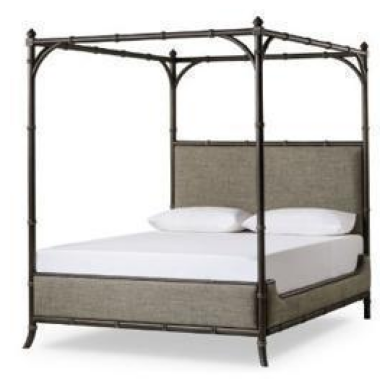

╭────────╮
│ chairs │
╰────────╯


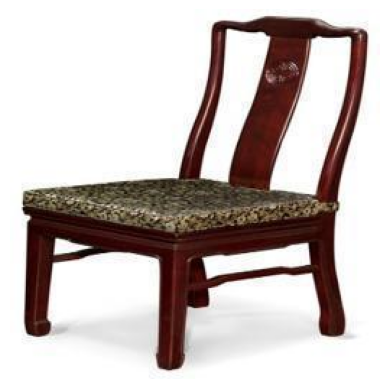

╭──────────╮
│ dressers │
╰──────────╯


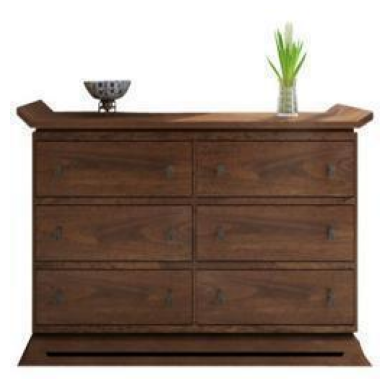

╭───────╮
│ lamps │
╰───────╯


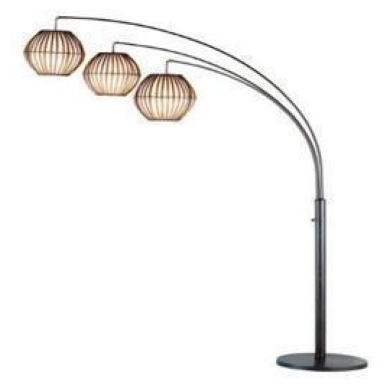

╭───────╮
│ sofas │
╰───────╯


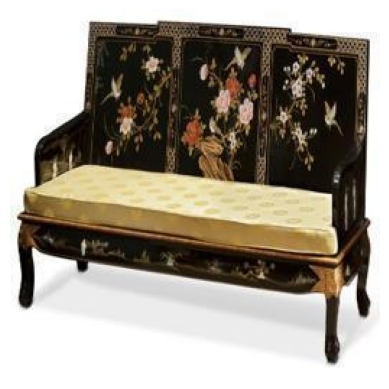

╭────────╮
│ tables │
╰────────╯


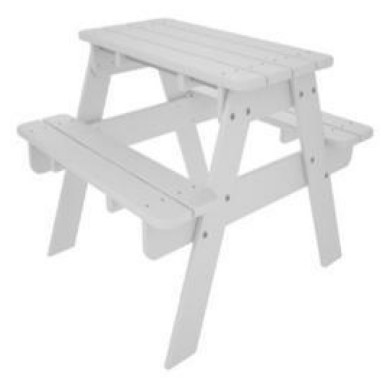

In [6]:
# Print the first 5 images
count = 0
for i in style_folders:
    for category, folder_path in image_dir.items():
        if count == 6:
            break
        style_folder_path = os.path.join(folder_path, i)

        # Print images key
        styler.boxify(f"{category}")

        images = leon.read_images(path=style_folder_path, limit=1)

        count += 1

### Initial Data Exploration

This initial exploration provides a high-level summary of the dataset characteristics. Here are the key findings:

- The dataset comprises over `90,000` images.
- Each image is linked to a specific style, with a total of `six` unique styles represented within the dataset.

### Subsequent Analysis

We will now proceed with a more in-depth examination of the dataset. This will involve identifying and resolving any **inconsistencies** or **duplicate entries** within the data. Additionally, we will conduct a univariate analysis to gain a clearer understanding of the data distribution and individual attributes. 

&rArr; This process will help us uncover any potential issues that might influence the performance of our machine learning model.

In [7]:
# for i in styles_array:
for category, folder_path in image_dir.items():
    # Print images key
    for i in style_folders:
        style_folder_path = os.path.join(folder_path, i)

        # Print images key
        styler.boxify(f"{category}: {i}")

        leon.detect_duplicates(
            path=style_folder_path, limit=-1, hash_type="phash", is_delete=True
        )

╭─────────────╮
│ beds: Asian │
╰─────────────╯
>>> Number of images compared: 132

>>> No duplicate images found.

╭─────────────╮
│ beds: Beach │
╰─────────────╯
╭────────────────────────╮
│ Hash: b88fd56ae1468b70 │
╰────────────────────────╯
  - 8149beach-style-kids-beds.jpg
  - aug_8149beach-style-kids-beds_0.jpg
>>> Number of images compared: 139

╭────────────────────╮
│ beds: Contemporary │
╰────────────────────╯


### Color Distribution

A color distribution chart provides a visual representation of the frequency of different color intensities within an image or set of images. In RGB color models, it plots each color channel (Red, Green, Blue) separately. These charts are used in image analysis to understand color composition, identify dominant colors, detect potential color abnormalities, and compare images based on their color distributions.
- 0 represents no intensity for that color, which is the darkest possible value, effectively contributing no color (black if all are 0).

- 255 represents the maximum intensity, where the color is at its brightest or most saturated state.

In [ ]:
import cv2
import os
from concurrent.futures import ThreadPoolExecutor

def process_image(image_path):
    img = cv2.imread(image_path)
    if img is not None:
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert from BGR to RGB
        img = cv2.resize(img, (128, 128))  # Resize to reduce computation
        reds = img[:, :, 0].flatten()
        greens = img[:, :, 1].flatten()
        blues = img[:, :, 2].flatten()
        return {'Red': reds, 'Green': greens, 'Blue': blues}
    return None  # Return None if loading fails

def aggregate_color_histogram(image_dir):
    with ThreadPoolExecutor() as executor:
        cols = 3  # Define the number of columns for the grid
        rows = (len(image_dir) + cols - 1) // cols  # Calculate the number of rows needed
        plt.figure(figsize=(20, 5 * rows))  # Set the figure size large enough to accommodate all subplots

        for index, (dataset, folder_path) in enumerate(image_dir.items(), start=1):
            print(f"Processing dataset: {dataset}")
            all_color_data = []

            subfolders = [os.path.join(folder_path, sub) for sub in os.listdir(folder_path) if os.path.isdir(os.path.join(folder_path, sub))]

            for subfolder in subfolders:
                image_files = [os.path.join(subfolder, file) for file in os.listdir(subfolder) if file.lower().endswith(('.png', '.jpg', '.jpeg'))]

                results = list(executor.map(process_image, image_files))
                results = [r for r in results if r is not None]

                if results:
                    all_color_data.extend(results)

            if all_color_data:
                color_data = pd.DataFrame(all_color_data)
                reds = np.concatenate(color_data['Red'].values)
                greens = np.concatenate(color_data['Green'].values)
                blues = np.concatenate(color_data['Blue'].values)

                plt.subplot(rows, cols, index)
                sns.histplot(blues, color='blue', element='step', stat='count', bins=256, kde=False, alpha=0.5, label='Blue')
                sns.histplot(greens, color='green', element='step', stat='count', bins=256, kde=False, alpha=0.5, label='Green')
                sns.histplot(reds, color='red', element='step', stat='count', bins=256, kde=False, alpha=0.5, label='Red')
                plt.title(f'Overall Color Distribution for {dataset}')
                plt.xlabel('Intensity Value')
                plt.ylabel('Count')
                plt.legend(title='Color Channels')

        plt.tight_layout()
        plt.show()

Processing dataset: tables
Processing dataset: sofas
Processing dataset: lamps
Processing dataset: chairs
Processing dataset: dressers
Processing dataset: beds


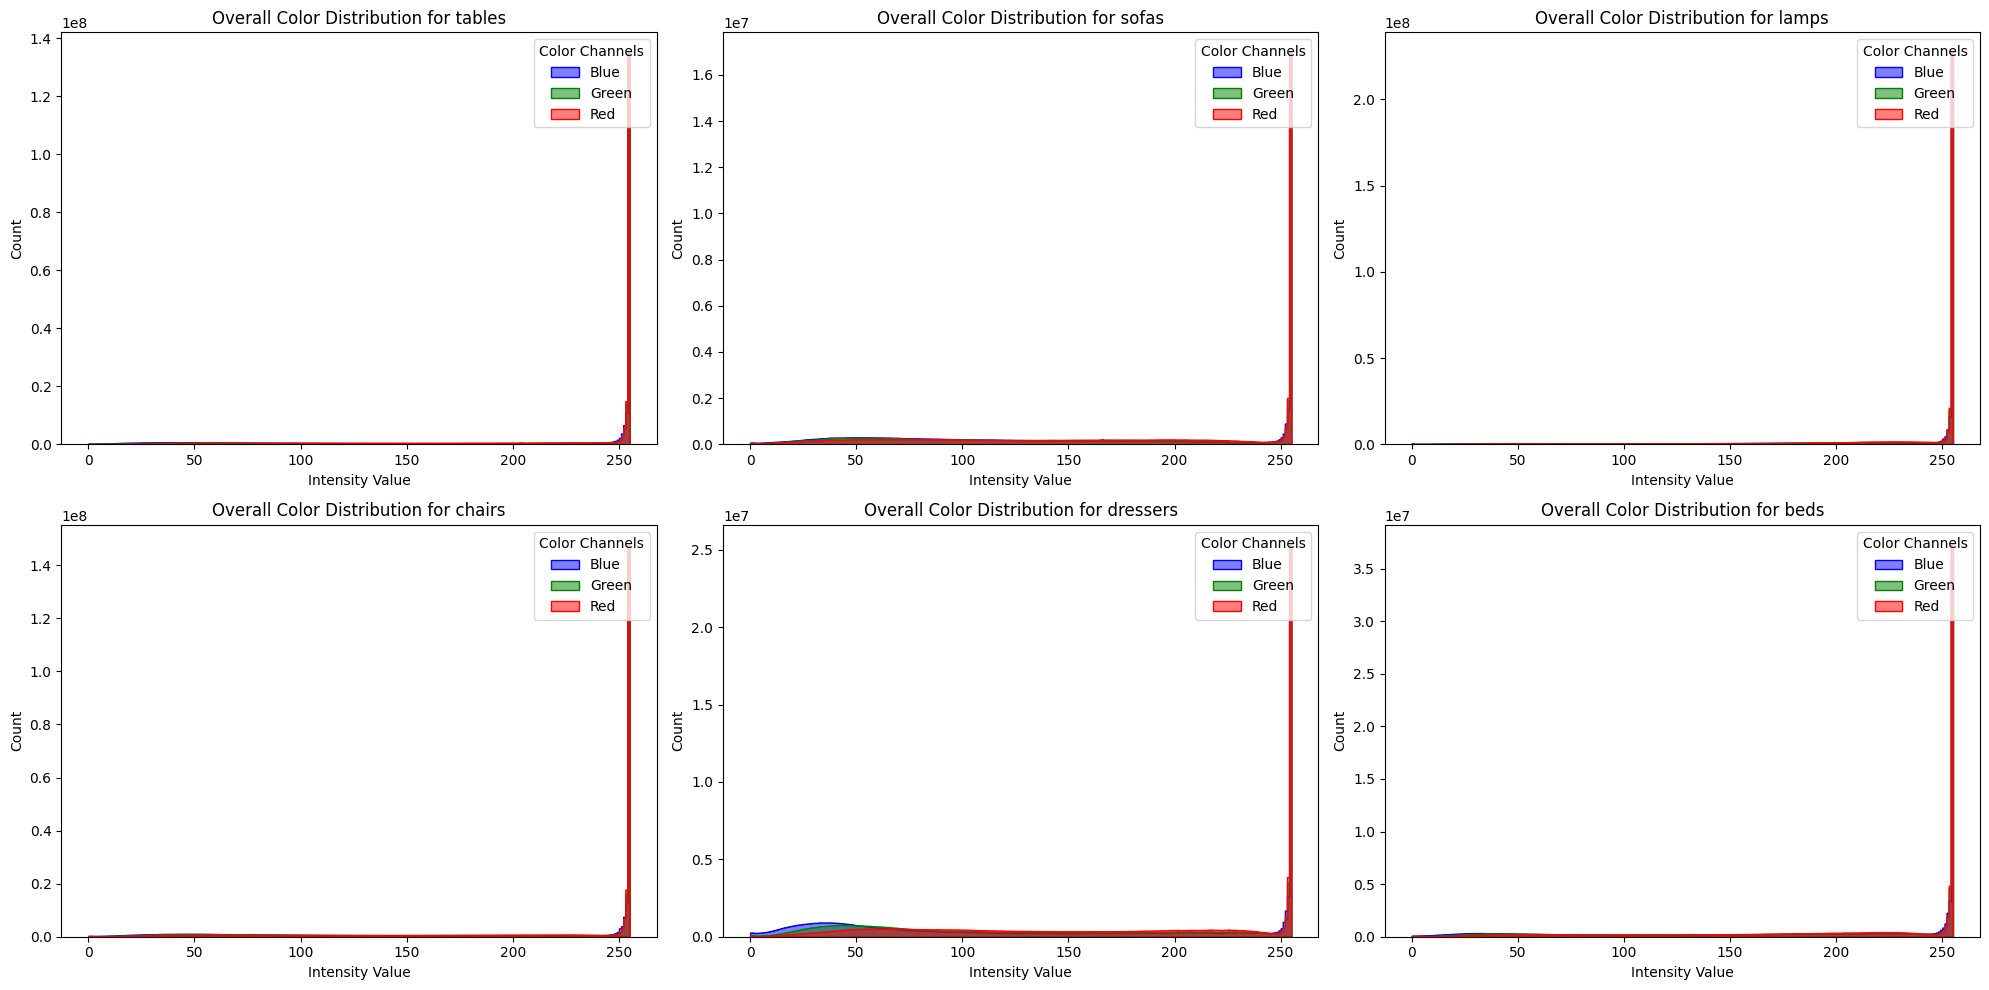

In [ ]:
aggregate_color_histogram(image_dir)

The ***RGB*** color distribution in the dataset's images shows minimal variation among the ***red***, ***green***, and **blue** channels, particularly in the lower intensity range from `0` to `230`. However, beyond the `230`The RGB color distribution in the dataset's images shows minimal variation among the red, green, and blue channels, particularly in the lower intensity range from `0` to `230`. However, beyond the `230` mark, there's a noticeable increase in frequency, indicating a sudden rise in color intensity. Notably, in the images of sofas and dressers, there are slight fluctuations in the `0` to `100` range compared to other items, suggesting subtle differences in color prominence. mark, there's a noticeable increase in frequency, indicating a sudden rise in color intensity. Notably, in the images of sofas and dressers, there are slight fluctuations in the `0` to `100` range compared to other items, suggesting subtle differences in color prominence.

#### Histogram of Orieted Gradients (HOG)

Histogram of Oriented Gradients (HOG) descriptors are well-suited for object recognition tasks like pedestrian detection and image classification. They analyze the distribution of edge directions within an image, focusing on the magnitude (strength) and orientation of gradients. This emphasis on edge strength and direction effectively captures features that describe both the texture and shape of objects,  making HOG descriptors valuable for distinguishing between different object classes.

In [ ]:
def analyze_hog_subfolders(image_dir):
    num_orientations = 9  # This must match the angle labels you want to use
    angle_step = 180 / num_orientations
    angle_labels = [int(i * angle_step) for i in range(num_orientations)]  # Generate labels for each bin

    for dataset, folder_path in image_dir.items():
        styler.boxify(f"Processing dataset: {dataset}")

        style_folders = [sub_folder for sub_folder in os.listdir(folder_path) if os.path.isdir(os.path.join(folder_path, sub_folder))]

        cols = 4
        rows = (len(style_folders) + cols - 1) // cols

        plt.figure(figsize=(20, rows * 5))  # Adjust the overall figure size

        for index, style_folder in enumerate(style_folders, 1):
            style_folder_path = os.path.join(folder_path, style_folder)
            # print(f"Processing style folder: {style_folder} in {dataset}")


            folder_hog_descriptors = []

            for image_file in os.listdir(style_folder_path):
                image_path = os.path.join(style_folder_path, image_file)
                image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

                if image is not None:
                    image = cv2.resize(image, (128, 128), interpolation=cv2.INTER_AREA)
                    fd = hog(image, orientations=num_orientations, pixels_per_cell=(8, 8),
                             cells_per_block=(2, 2), visualize=False, feature_vector=True)

                    fd_reshaped = fd.reshape(-1, num_orientations).sum(axis=0)
                    folder_hog_descriptors.append(fd_reshaped)
                else:
                    print(f"Failed to load image at {image_path}")

            if folder_hog_descriptors:
                combined_hog_descriptor = np.sum(folder_hog_descriptors, axis=0)

                plt.subplot(rows, cols, index)
                plt.bar(angle_labels, combined_hog_descriptor, alpha=0.75,width=angle_step * 0.8)
                plt.title(f'{style_folder}')
                plt.xlabel('Orientation Angles (degrees)')
                plt.ylabel('Frequency')
                plt.xticks(angle_labels)

        plt.tight_layout()
        plt.show()


╭────────────────────────────╮
│ Processing dataset: tables │
╰────────────────────────────╯


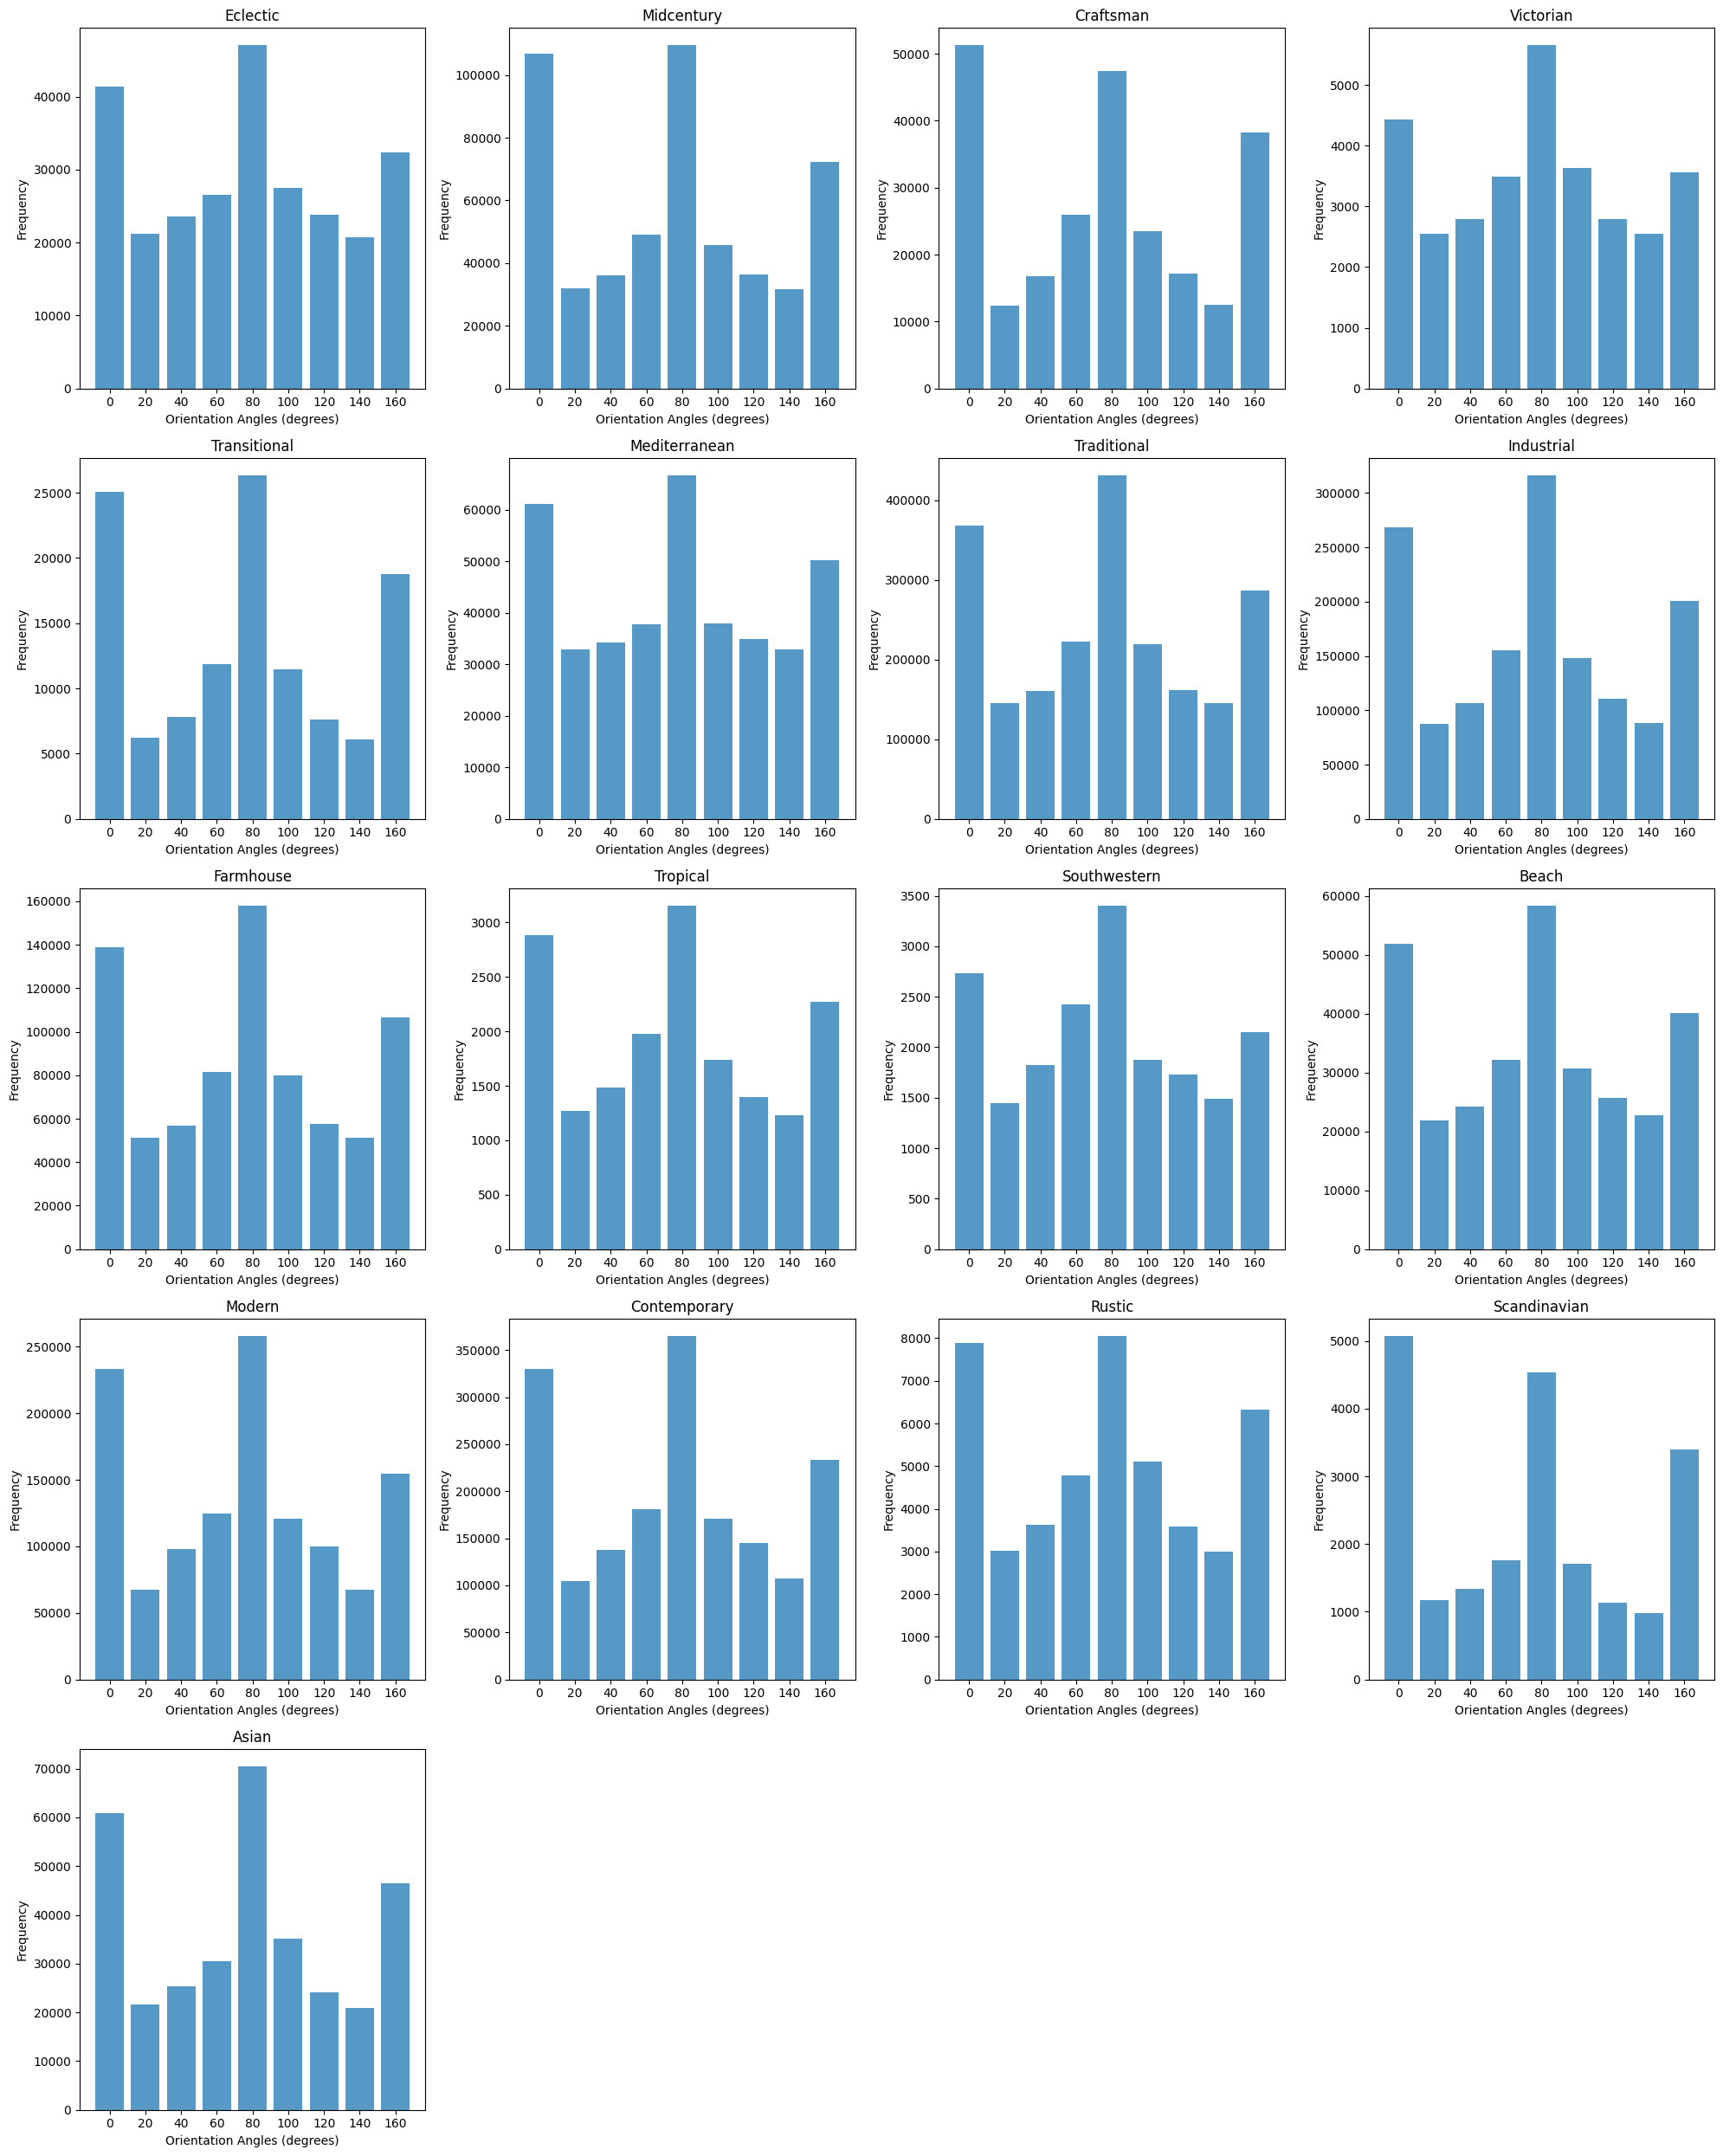

╭───────────────────────────╮
│ Processing dataset: sofas │
╰───────────────────────────╯


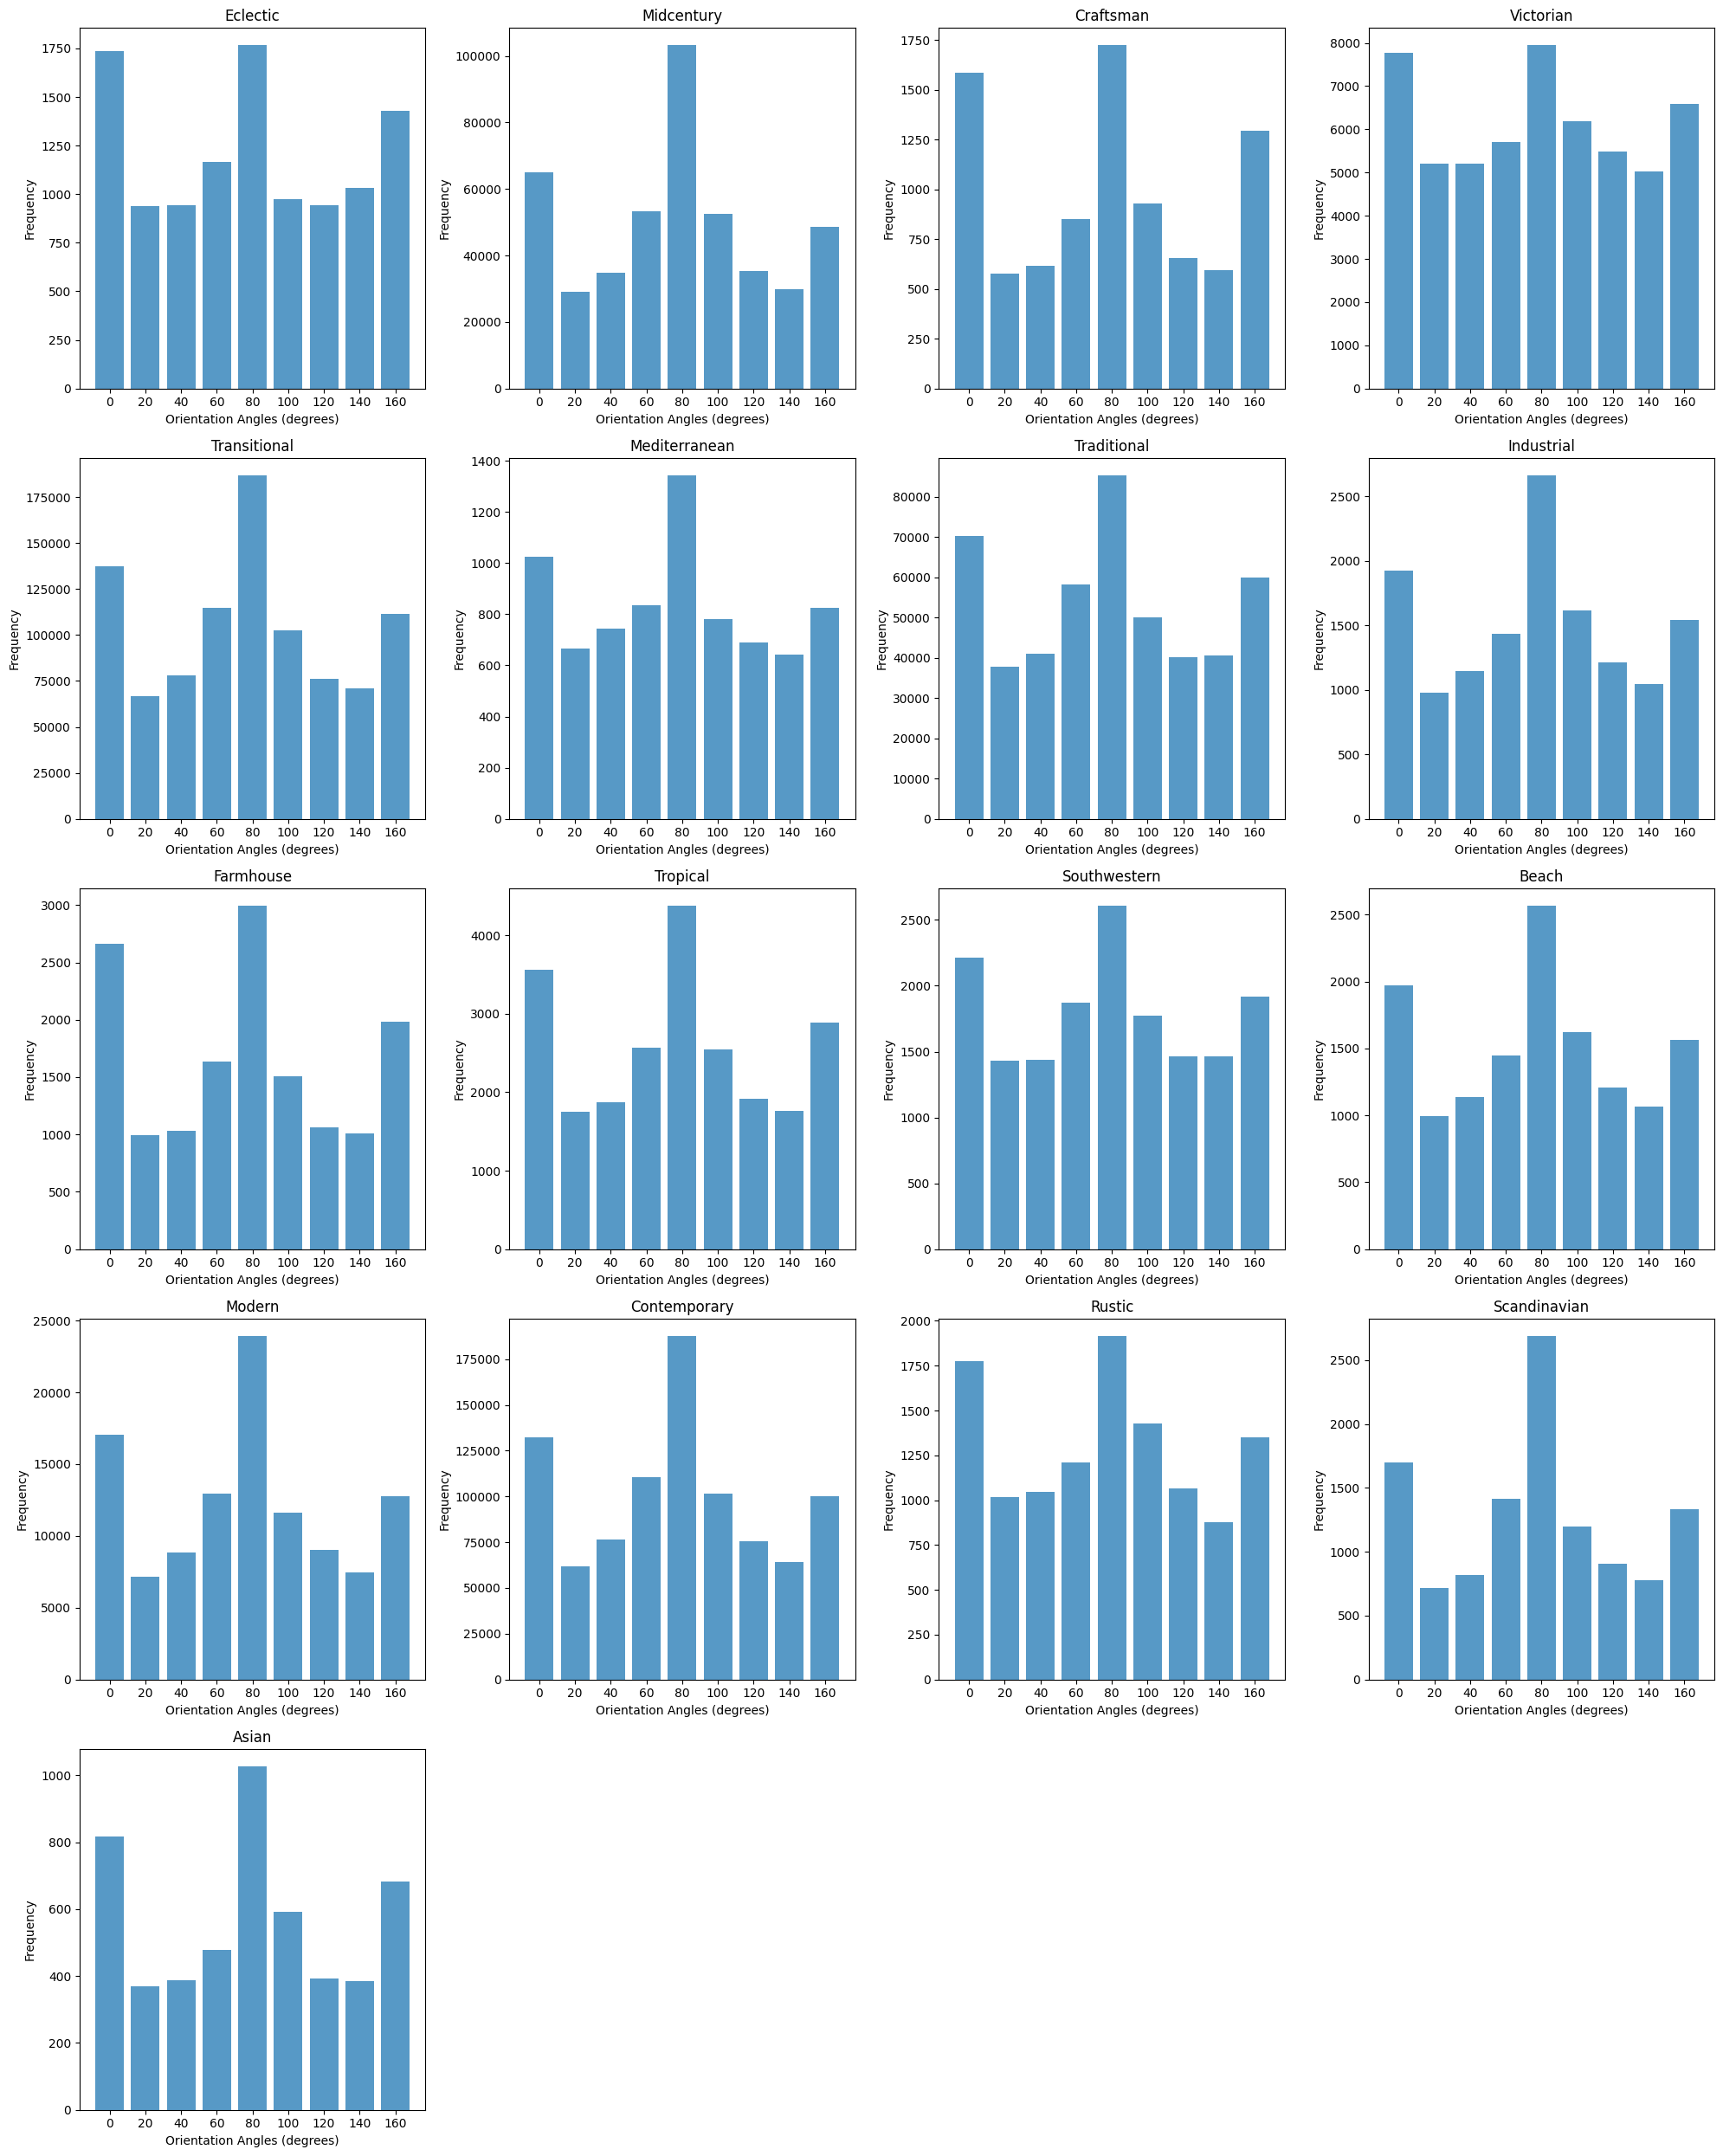

╭───────────────────────────╮
│ Processing dataset: lamps │
╰───────────────────────────╯


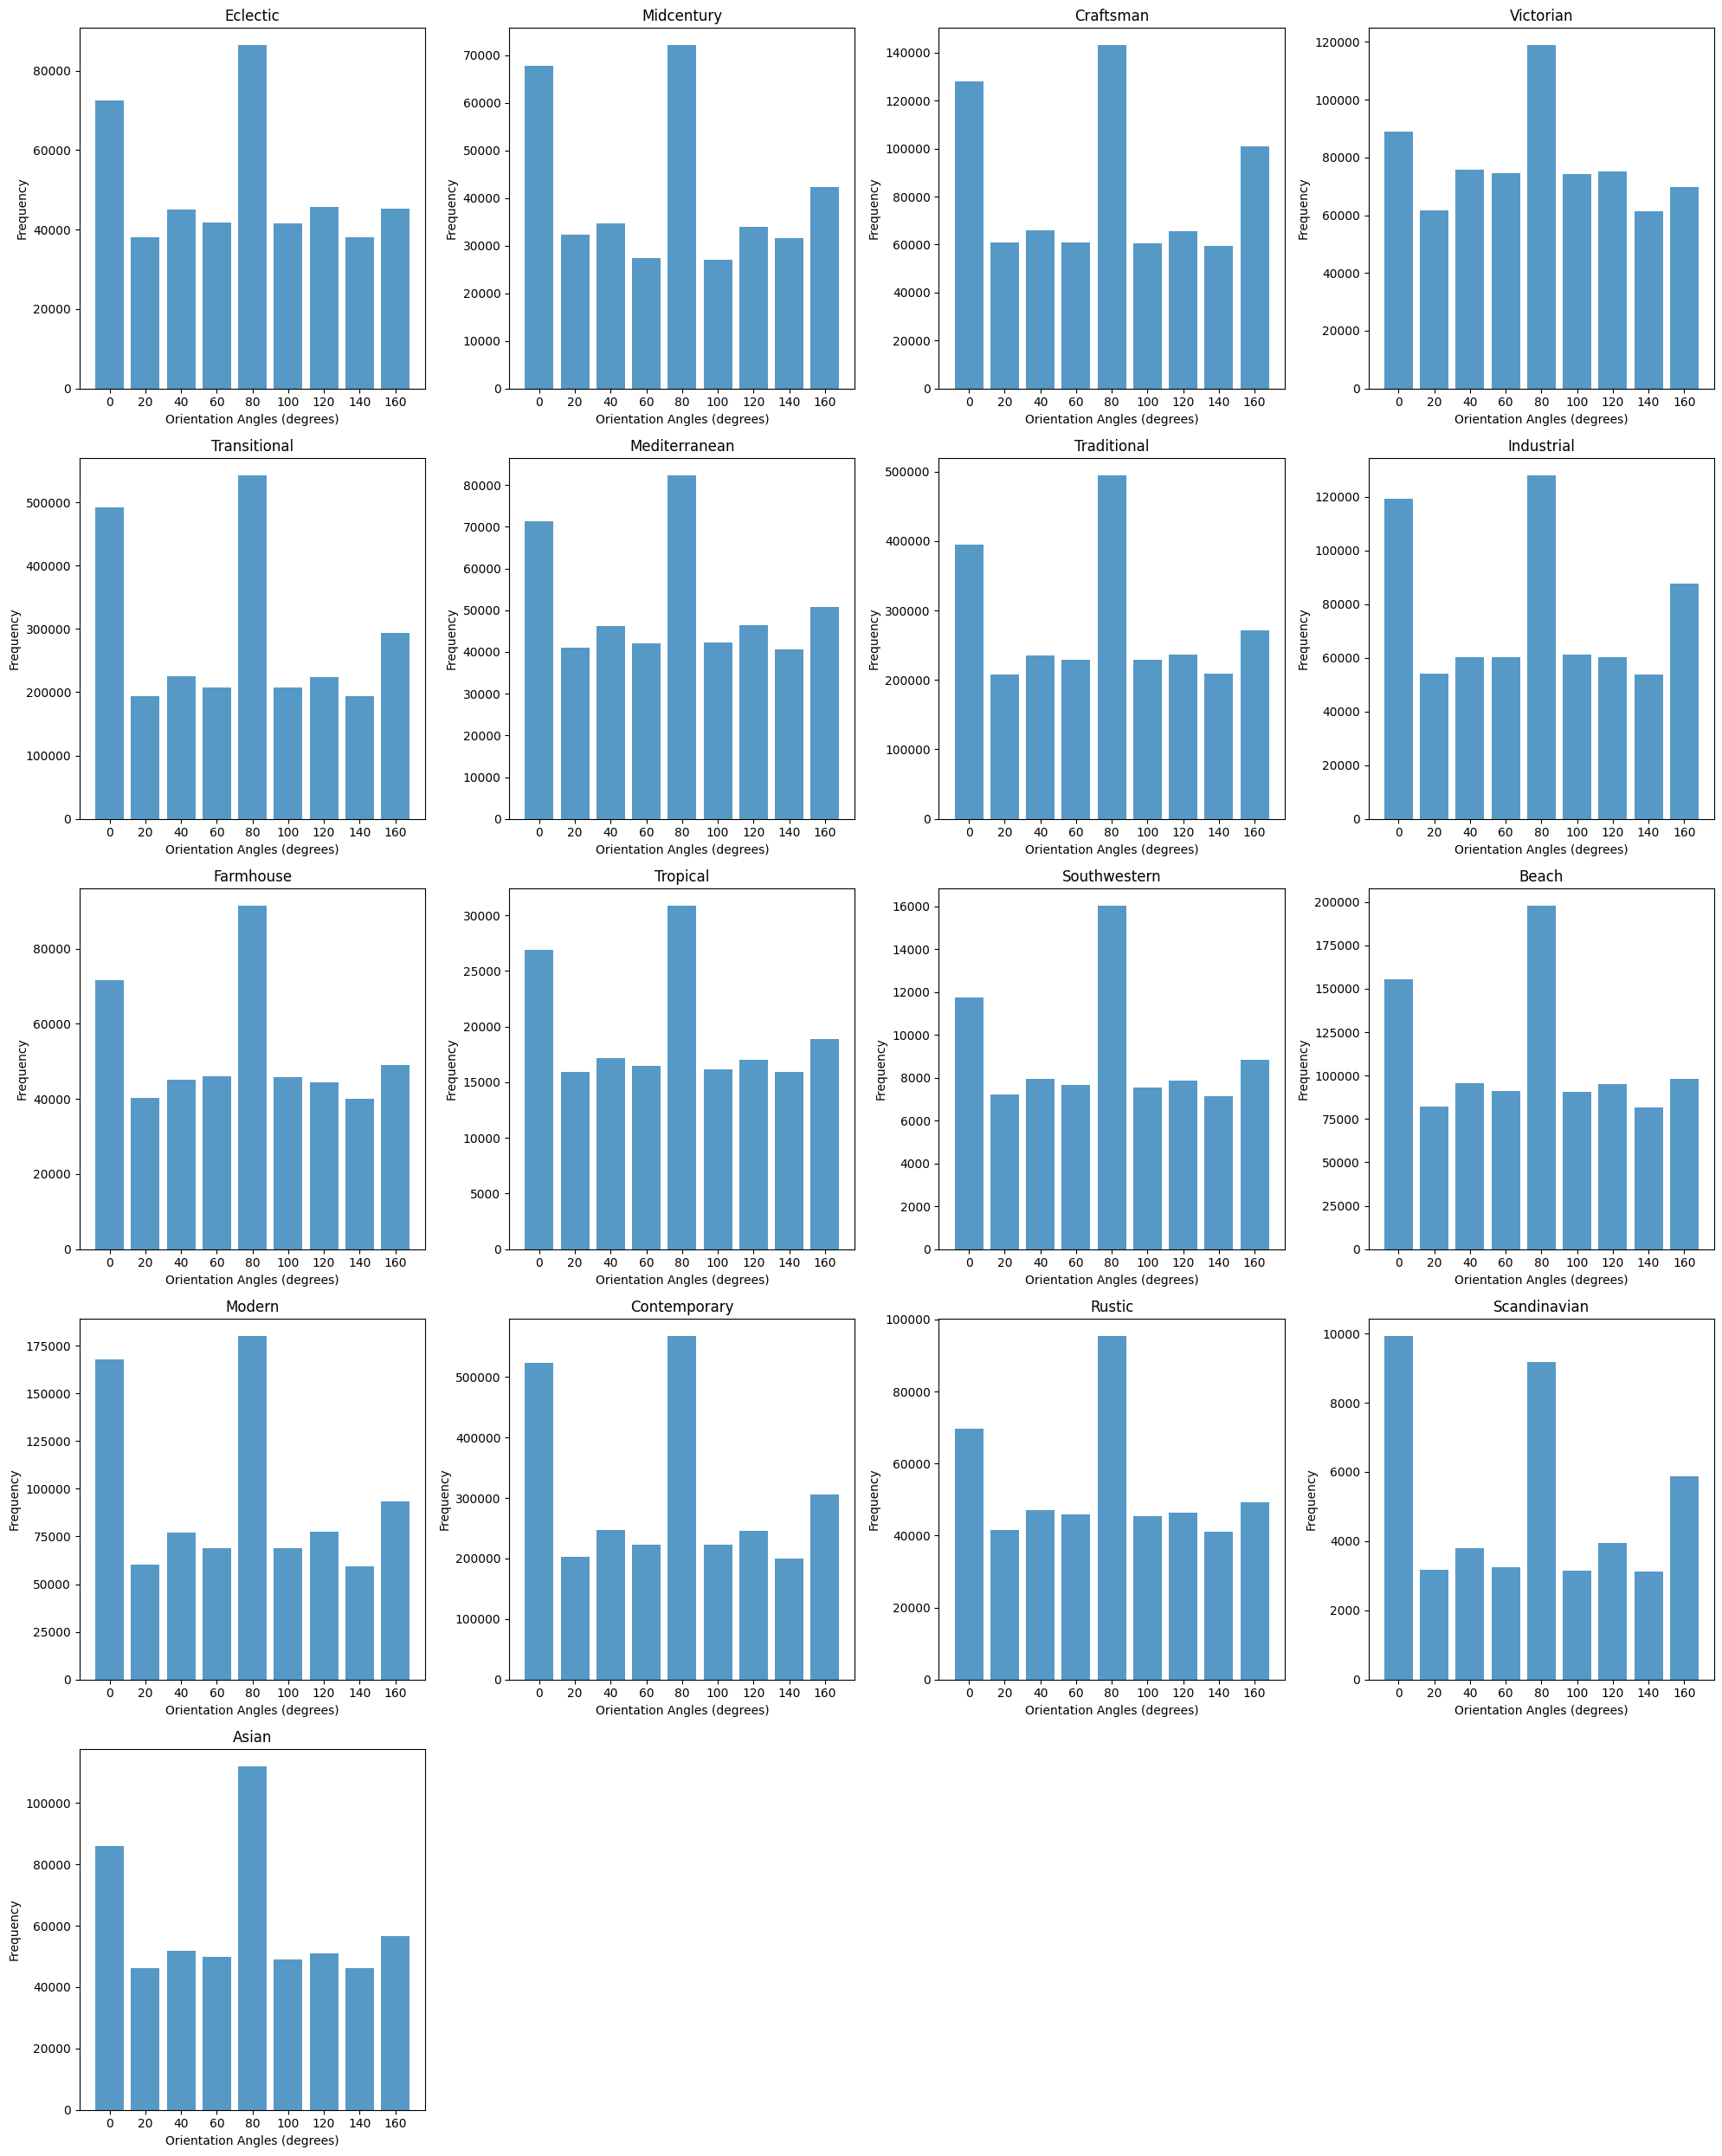

╭────────────────────────────╮
│ Processing dataset: chairs │
╰────────────────────────────╯


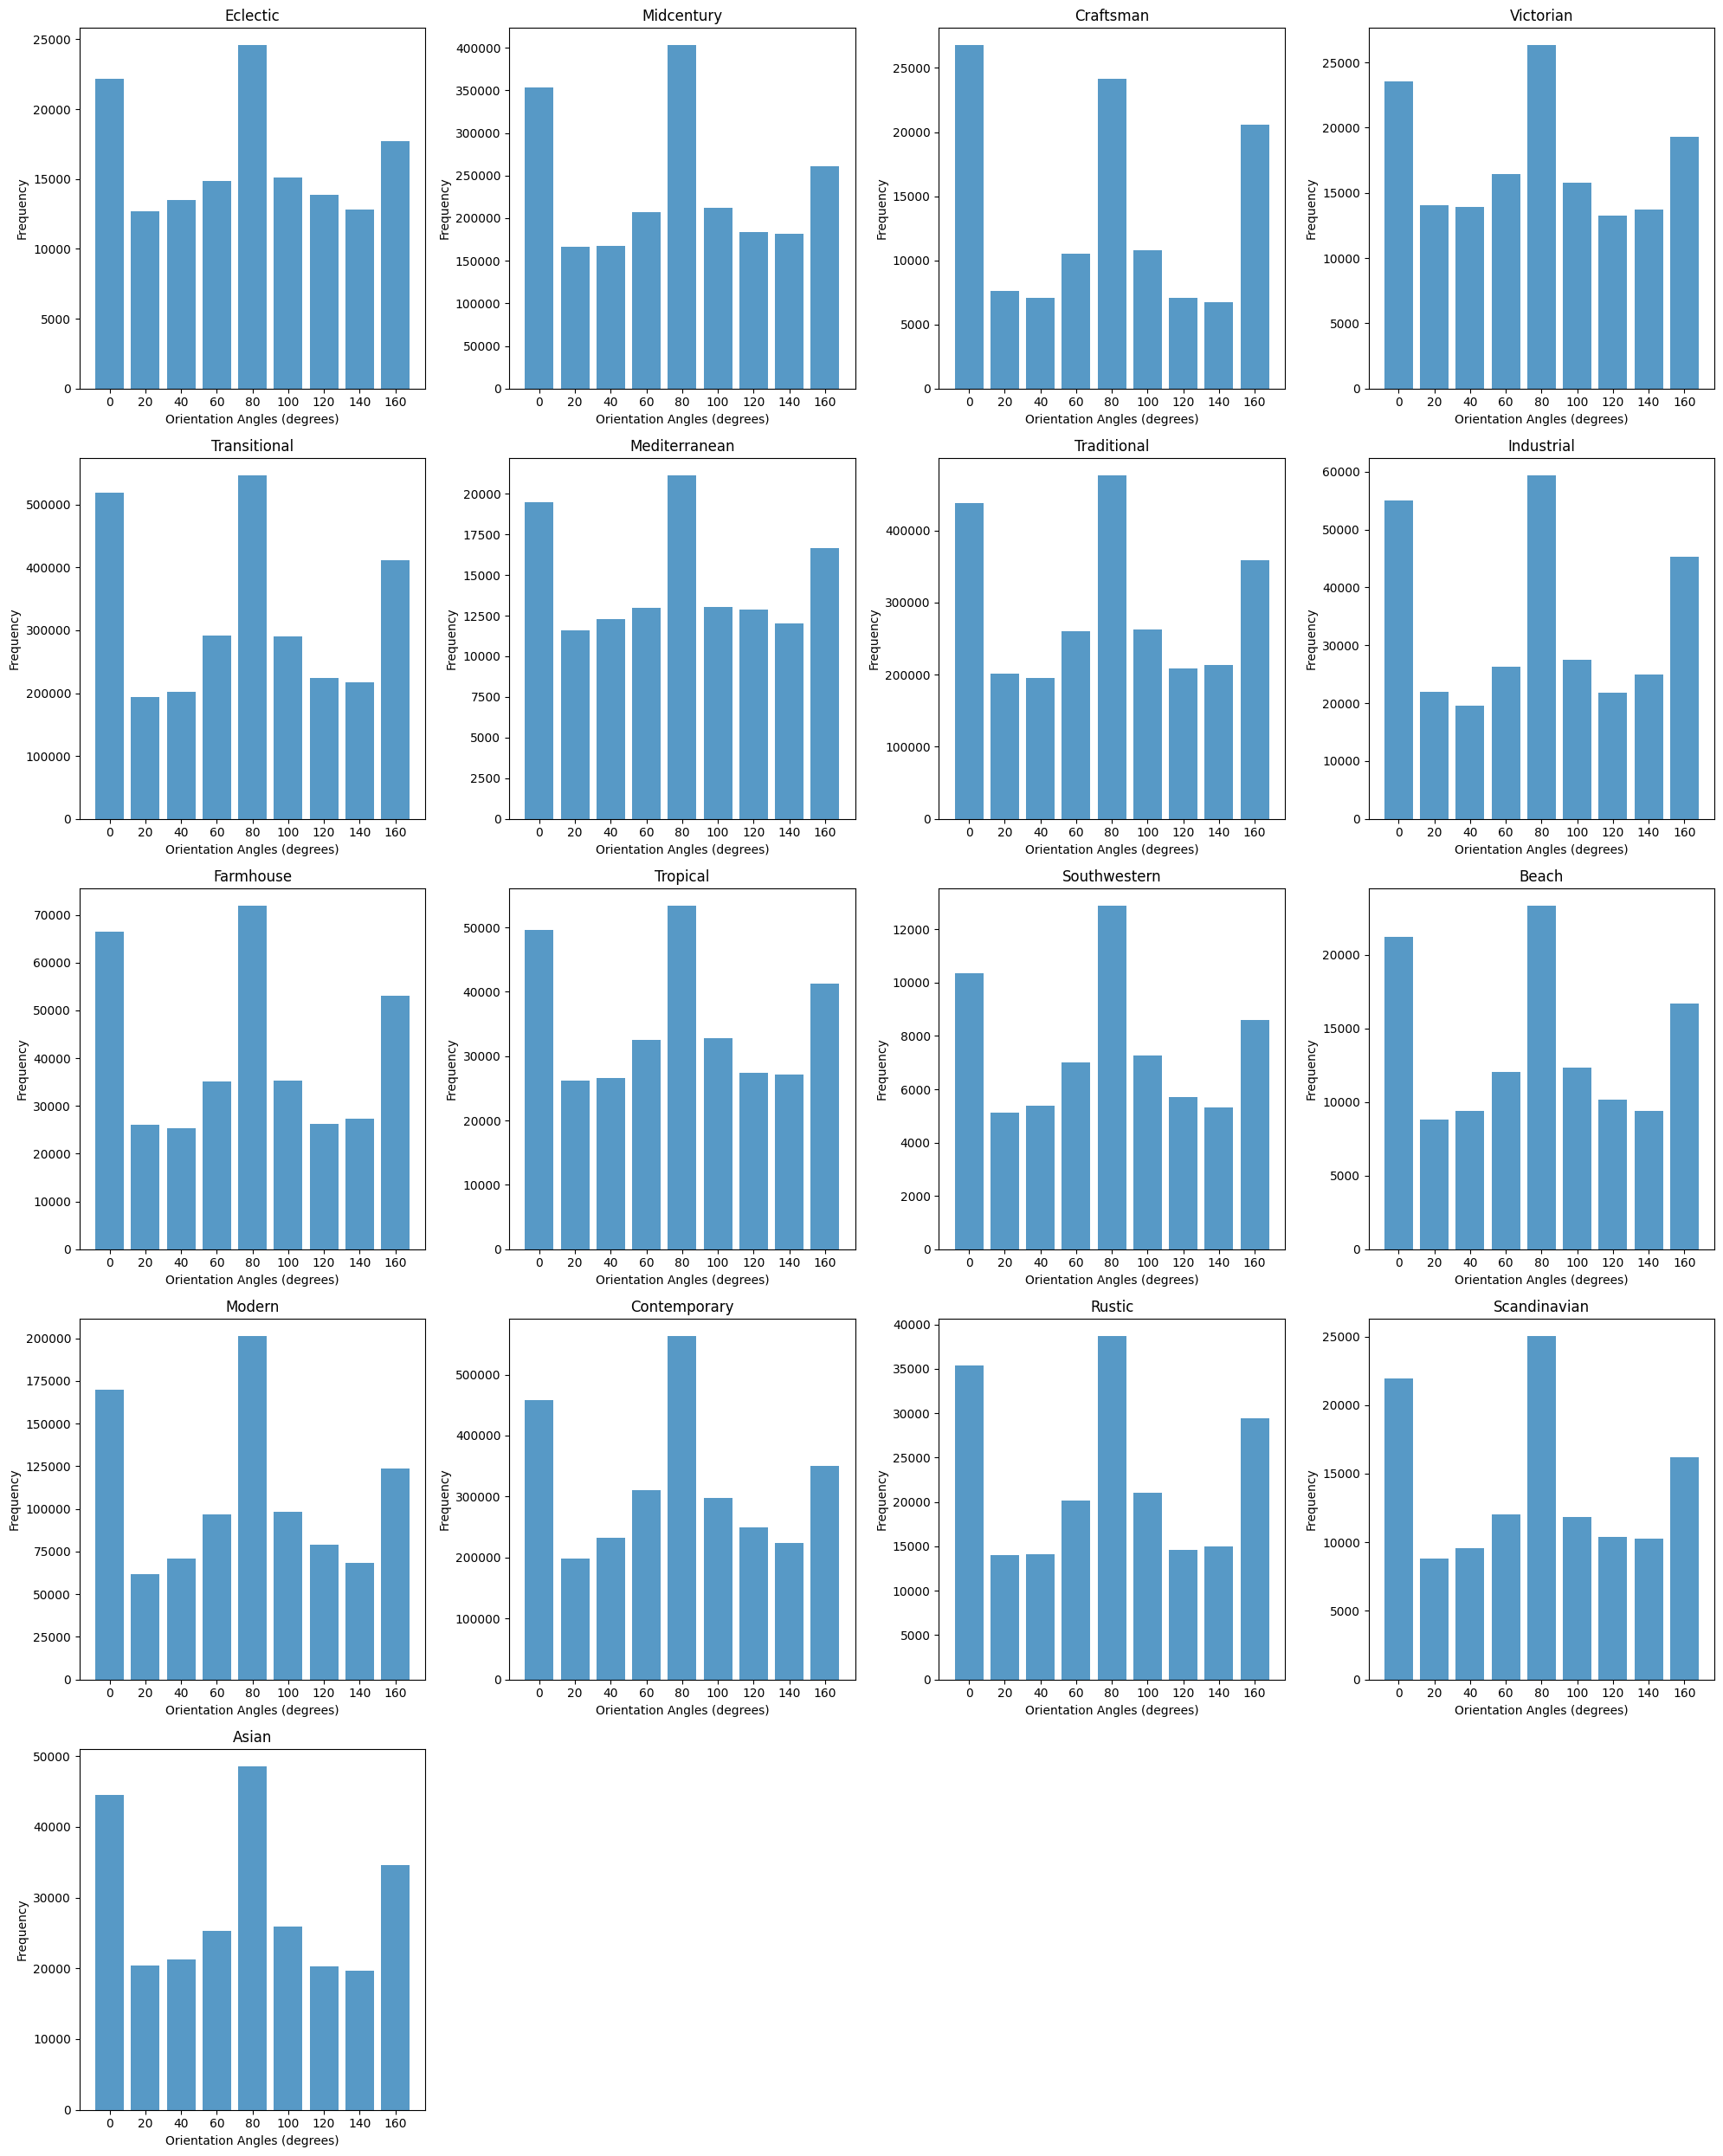

╭──────────────────────────────╮
│ Processing dataset: dressers │
╰──────────────────────────────╯


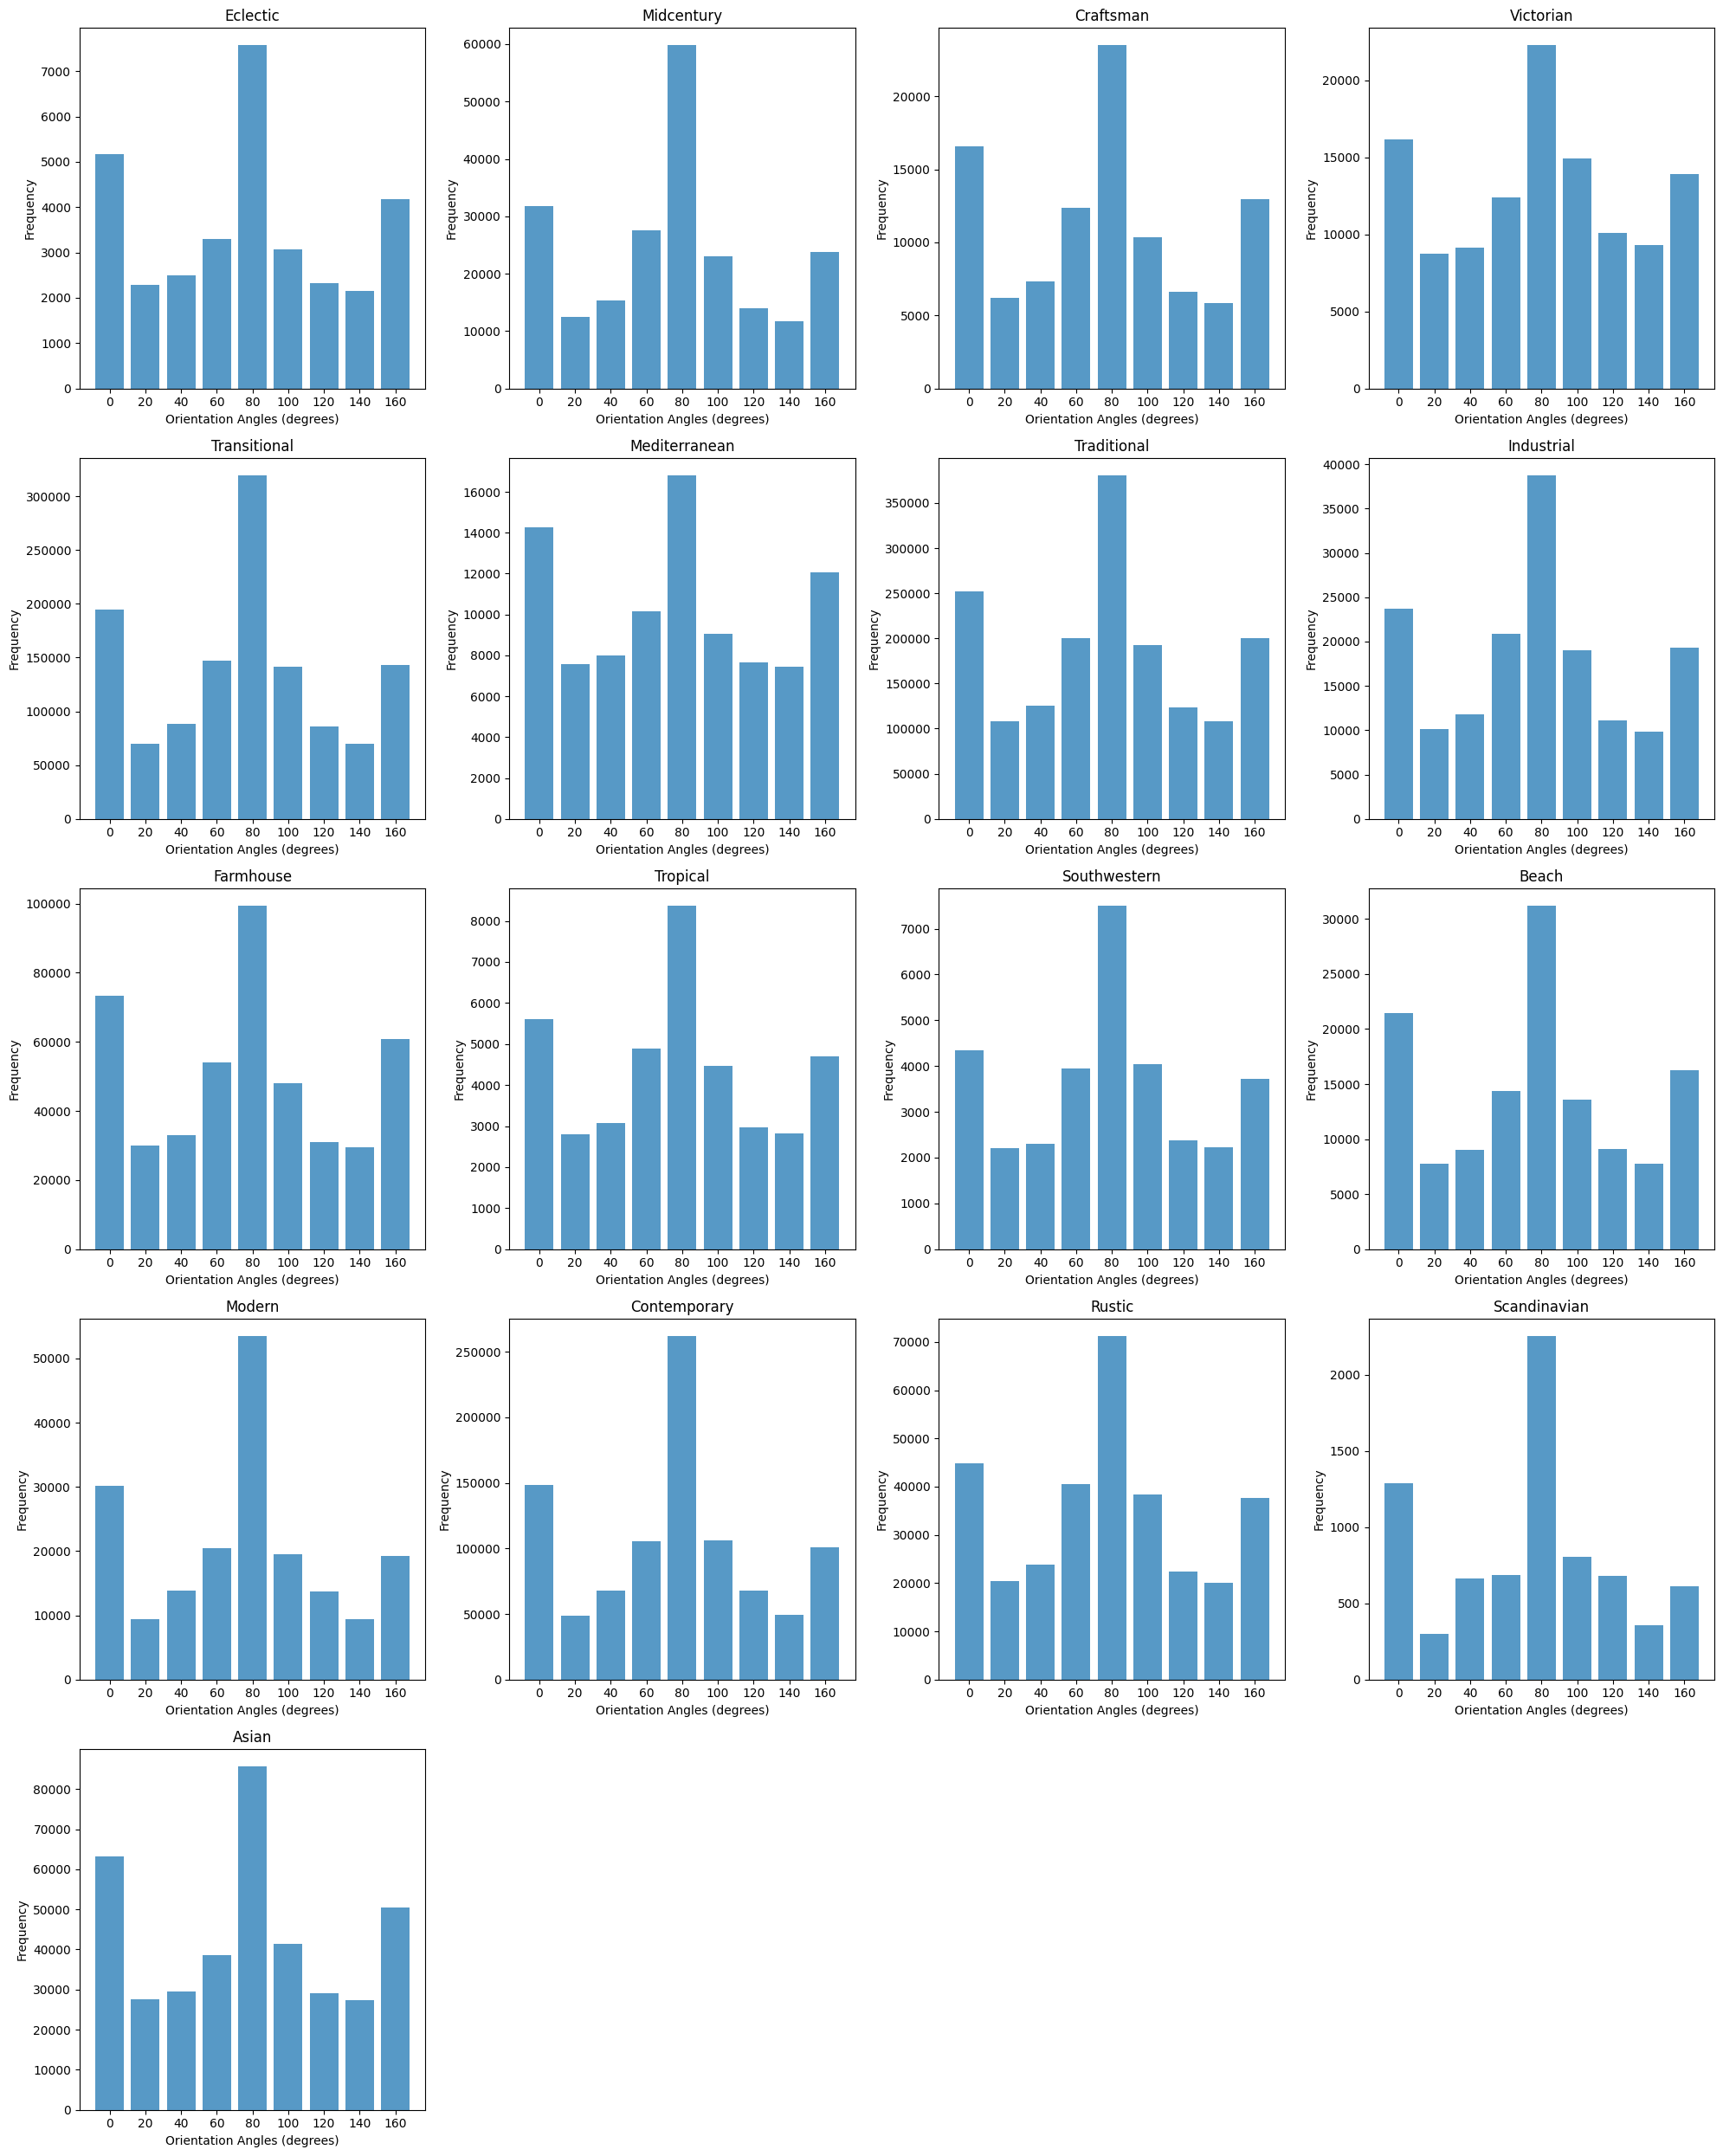

╭──────────────────────────╮
│ Processing dataset: beds │
╰──────────────────────────╯


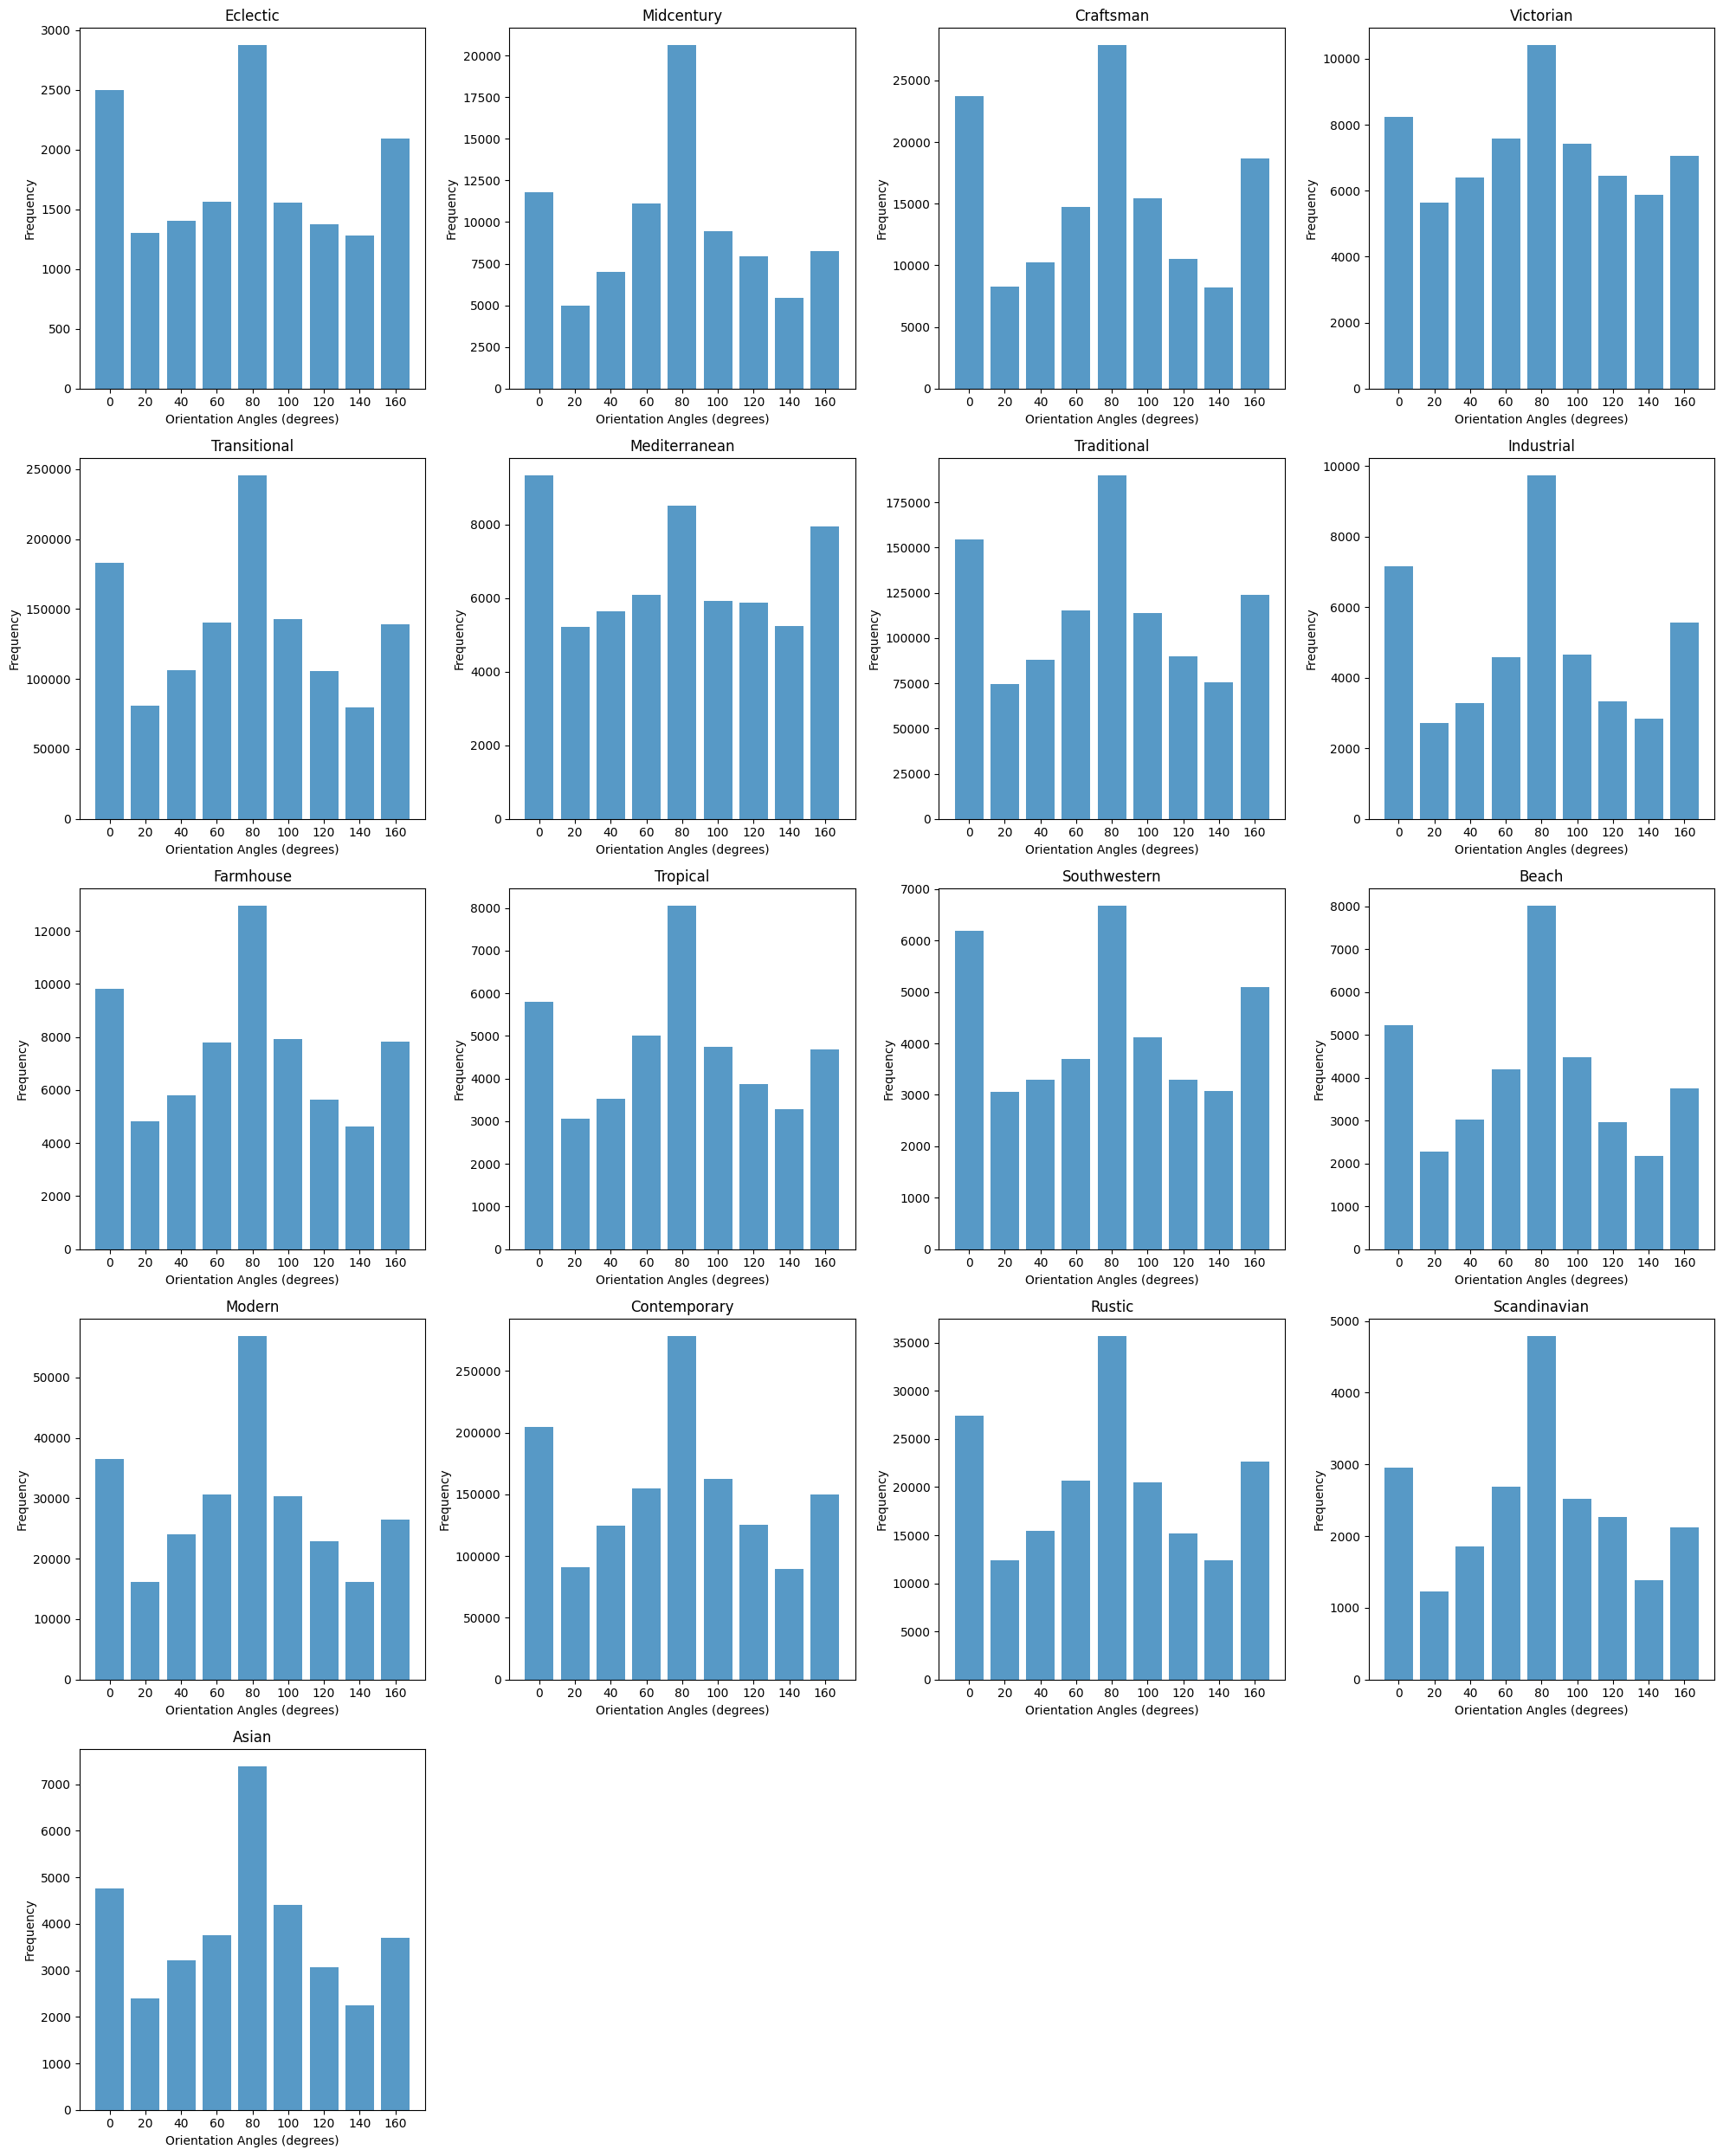

In [ ]:
analyze_hog_subfolders(image_dir)

#### For tables:

- Focused Peaks: Styles like "Modern" and "Midcentury" display strong preferences for specific angles, indicating common structural orientations in these designs.

- Variability: "Eclectic" and "Transitional" exhibit a wider range of angles, suggesting a more diverse architectural approach.

- Key Trends:
"Industrial" and "Modern" feature pronounced peaks, reflecting consistent design elements.
"Victorian" and "Craftsman" have multiple peaks, representing detailed and ornate styles.

#### For sofas:
- Balanced Distributions:
"Eclectic": Exhibits peaks at 20, 60, 100, and 140 degrees, indicating a versatile design approach that integrates a wide range of angles.
"Mediterranean": Frequencies are notable at 40, 80, and 120 degrees, characteristic of the style's emphasis on openness and flow in architectural features.

- Sharp Peaks:
"Transitional": Strong peaks at 20 and 100 degrees reflect a blend of traditional and contemporary elements, focusing on geometric clarity.
"Modern": Dominant peak at 100 degrees, typical of modern architecture's preference for minimalism and asymmetry.

- Style Variations:
"Industrial": Significant peaks at 60 and 120 degrees, associated with the style’s functional and utilitarian design elements.
"Victorian": Varied peaks at 40, 80, and 160 degrees, demonstrating the ornate and complex designs typical of Victorian architecture.

#### For lamps:
- Balanced Distributions:
"Eclectic": Shows frequencies at 20, 60, 100, and 140 degrees, supporting a variety of architectural elements, which is typical for a style known for its varied and diverse aesthetic.
"Mediterranean": Notable frequencies at 40, 80, and 120 degrees, suggesting use of these angles in typical Mediterranean features like arched doorways and open terraces.

- Sharp Peaks:
"Transitional": Significant peaks at 20 and 100 degrees, blending modern clean lines with traditional forms, reflecting its hybrid aesthetic.
"Modern": Strong peak at 100 degrees, which might be indicative of the minimalist and angular forms popular in modern design.

- Style Variations:
"Industrial": Peaks at 60 and 120 degrees could relate to the use of large, open spaces with high ceilings and exposed structural elements typical of industrial spaces.
"Victorian": Peaks at 40, 80, and 160 degrees suggest the use of varied angles in ornate design elements like gabled roofs and intricate window frames.

#### For chairs:
- Balanced Distributions:
"Eclectic": Shows peaks at 20, 60, 100, and 140 degrees, supporting varied design elements typical of eclectic architecture.
"Mediterranean": Prominent peaks at 40 and 80 degrees, reflecting common architectural features such as arched doorways.

- Sharp Peaks:
"Transitional": Significant peaks at 20 and 100 degrees, indicating a preference for clean, modern lines combined with traditional forms.
"Modern": A distinct peak at 100 degrees suggests a preference for minimalist and geometric forms.

- Style Variations:
"Industrial": Shows peaks at 60 and 100 degrees, indicating common angles used in industrial designs, likely for functional aspects of large, open spaces.
"Victorian": Even distribution with slight peaks at 40, 80, and 120 degrees, representing the varied and intricate designs typical of the Victorian era.

#### For dressers:
- Balanced Distributions:
"Eclectic": Shows peaks at 20, 60, 100, and 140 degrees, supporting varied design elements typical of eclectic architecture.
"Mediterranean": Prominent peaks at 40 and 80 degrees, reflecting common architectural features such as arched doorways.

- Sharp Peaks:
"Transitional": Significant peaks at 20 and 100 degrees, indicating a preference for clean, modern lines combined with traditional forms.
"Modern": A distinct peak at 100 degrees suggests a preference for minimalist and geometric forms.

- Style Variations:
"Industrial": Shows peaks at 60 and 100 degrees, indicating common angles used in industrial designs, likely for functional aspects of large, open spaces.
"Victorian": Even distribution with slight peaks at 40, 80, and 120 degrees, representing the varied and intricate designs typical of the Victorian era.

#### For beds:

- Distinct Peaks: Styles like "Midcentury," "Victorian," and "Modern" show strong preferences for specific angles (notably 120 degrees), suggesting recurring design elements at these orientations.

- Variability: "Eclectic" and "Transitional" display more varied distributions, indicating diverse structural orientations.

- Common Trends: Many styles, such as "Craftsman" and "Rustic," feature peaks at 60 and 120 degrees, likely reflecting common architectural features like roof angles or furniture layouts.

### Gradient Magnitude

By calculating the gradient magnitude, we can discern how abruptly or gently the pixel values change, which helps in identifying boundaries and textures in images. The process involves computing the gradients in the horizontal and vertical directions (typically using operators like Sobel or Prewitt), and then combining these gradients to form the overall magnitude.

In [ ]:
def compute_gradient_magnitude(image_path):
    try:
        image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
        if image is None:
            print(f"Failed to load image at {image_path}")
            return np.array([])

        # Resize image to reduce memory usage
        image = cv2.resize(image, (128, 128))

        grad_x = cv2.Sobel(image, cv2.CV_64F, 1, 0, ksize=3)
        grad_y = cv2.Sobel(image, cv2.CV_64F, 0, 1, ksize=3)
        magnitude = np.sqrt(grad_x**2 + grad_y**2)
        return magnitude.ravel()
    except Exception as e:
        print(f"Error processing image at {image_path}: {e}")
        return np.array([])

def analyze_gradient_magnitude_folders(image_dir):
    num_datasets = len(image_dir)
    # Determine the grid layout for subplots
    cols = 2
    rows = (num_datasets + 1) // cols
    fig, axes = plt.subplots(rows, cols, figsize=(15, 5 * rows))
    axes = axes.ravel()  # Flatten the axes array if it's 2D

    for idx, (dataset, folder_path) in enumerate(image_dir.items()):
        print(f"Processing dataset: {dataset}")
        all_gradient_magnitudes = []

        for subfolder in os.listdir(folder_path):
            subfolder_path = os.path.join(folder_path, subfolder)
            if os.path.isdir(subfolder_path):
                for image_file in os.listdir(subfolder_path):
                    image_path = os.path.join(subfolder_path, image_file)
                    gradient_magnitudes = compute_gradient_magnitude(image_path)
                    if gradient_magnitudes.size > 0:
                        all_gradient_magnitudes.extend(gradient_magnitudes)

        if all_gradient_magnitudes:
            axes[idx].hist(all_gradient_magnitudes, bins=50, alpha=0.75, color='gray')
            axes[idx].set_title(f'Aggregate Gradient Magnitudes for {dataset}')
            axes[idx].set_xlabel('Magnitude')
            axes[idx].set_ylabel('Frequency')
        else:
            print(f"No valid images or gradient data found in {folder_path}")

    # Adjust the layout and display the plots
    plt.tight_layout()
    plt.show()


Processing dataset: tables
Processing dataset: sofas
Processing dataset: lamps
Processing dataset: chairs
Processing dataset: dressers
Processing dataset: beds


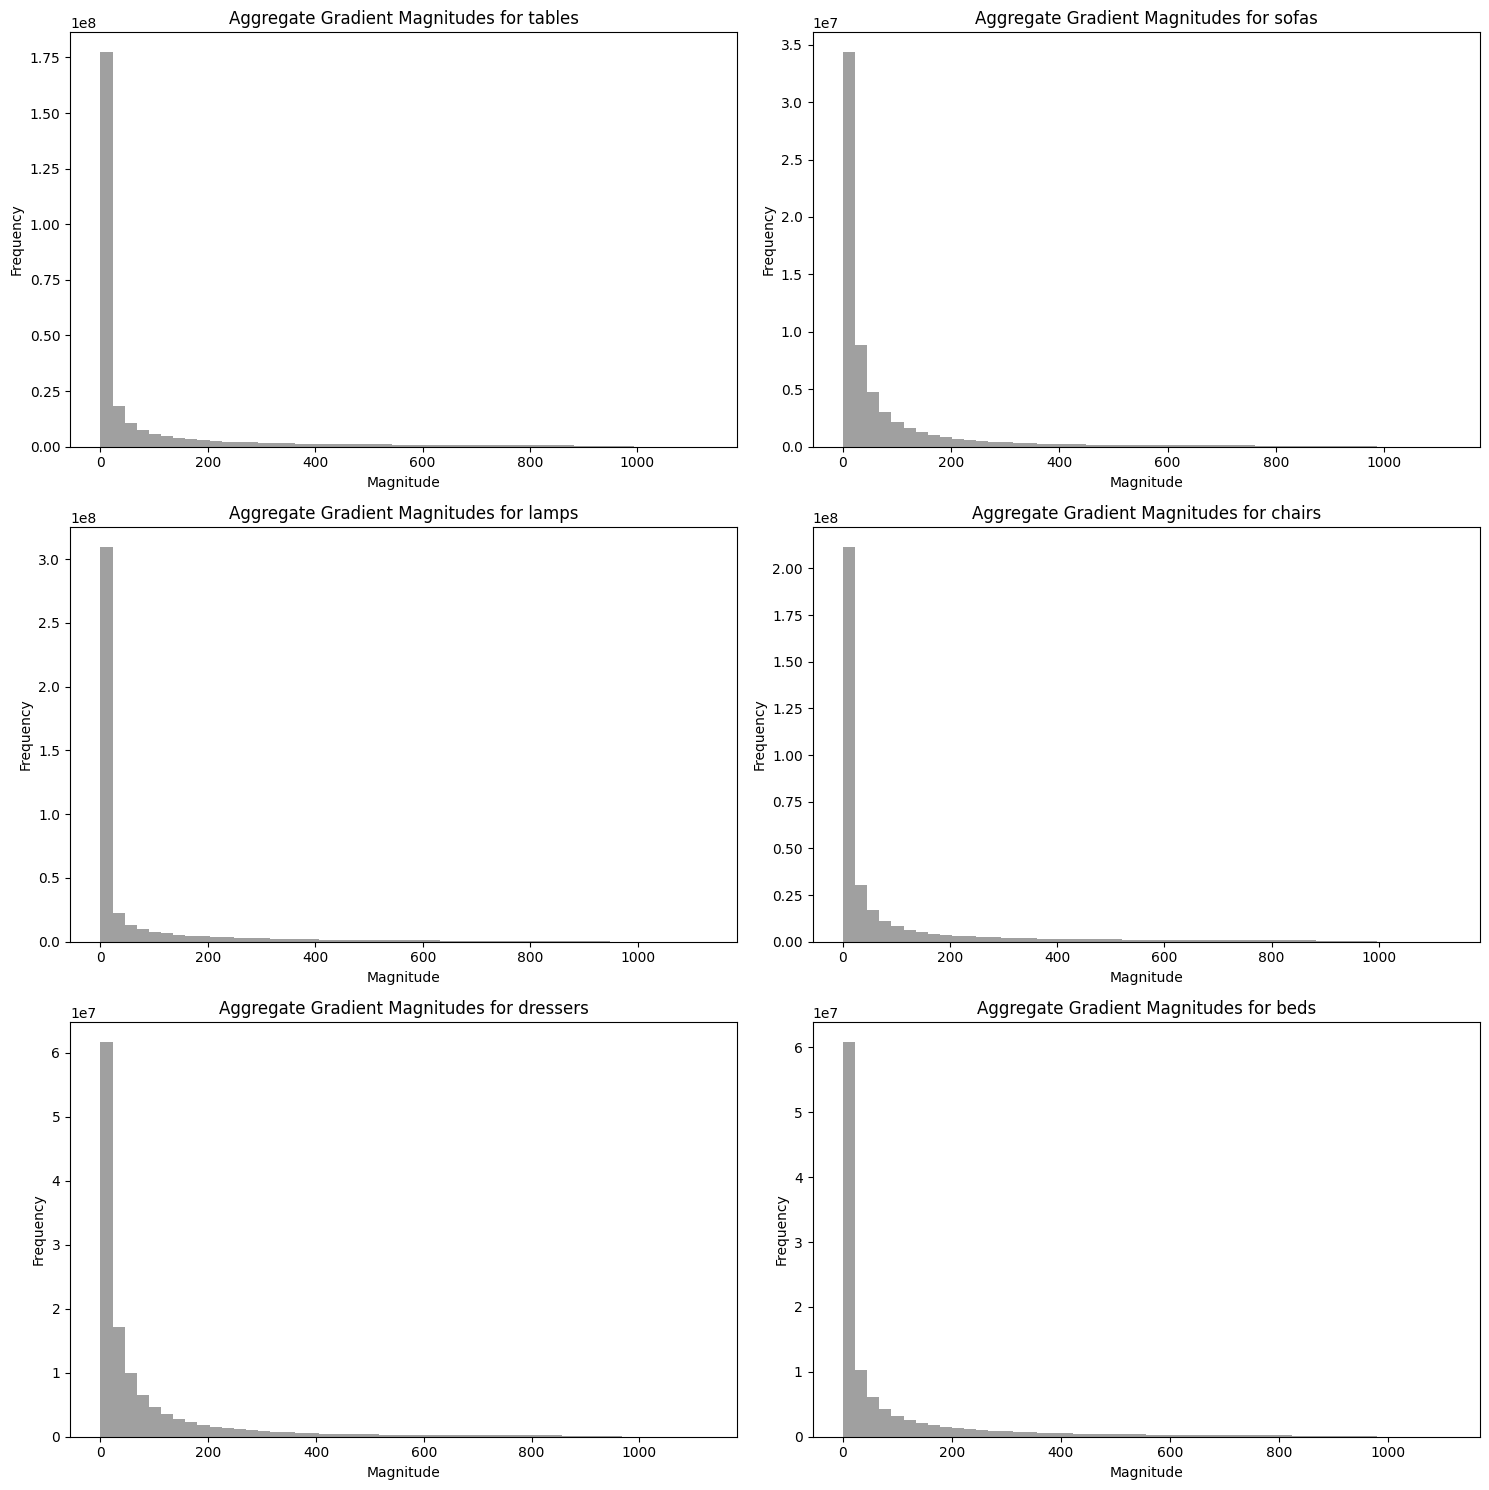

In [ ]:
analyze_gradient_magnitude_folders(image_dir)

#### Overall:
* High Frequency of Low Magnitudes: The histogram peaks sharply at the lowest gradient magnitude range, indicating that a large portion of the image areas are either uniform in color or exhibit smooth transitions. This suggests that all the furniture image in the dataset generally have large areas with minimal textural or color variations.

* Rapid Decline in Frequency: As with the other datasets, there is a rapid decrease in the frequency of higher gradient magnitudes. This suggests that stark contrasts or sharp edges are relatively rare in the images.
* Scarcity of High Gradient Magnitudes: Very high gradient magnitudes are almost absent, which indicates that there are very few harsh transitions or high-contrast details in the images. This could be due to the shape and design of furniture, which often feature smooth contours and consistent materials.

Overall, the data suggests that images of furniture, mostly feature smooth textures with only occasional sharp edges or high contrast areas.
